# CreditCard Users Churn Prediction

# 1. <a id = "link1"></a> Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards.

 In this notebook, I am using the models based on ensemble techniques(bagging, boosting) to predict whether a customer will leave their credit card services. The dataset contains various independent variables such as `Age`, `Income Category`, `Education Level`, `MaritalStatus` etc. that are being analyzed. The data will be trained by these models and perform hyperparameter tuning using GridSearchCV and RadomizedSearchCV techniques to improve model performance.

## Objective:

**The dataset aims to answer the following key questions:**

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank


## Data Dictionary:

### Customer details:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Index


- <a href = #link1># Problem Statement </a>


- <a href = #link2># Loading libraries </a>


- <a href = #link3># Loading and exploring the data </a> 


- <a href = #link4># Data Exploratory Analysis </a>


- <a href = #link5># Data Pre-processing </a> 


- <a href = #link6># Model Building</a>


- <a href = #link7># Model building - Logistic Regression </a>


- <a href = #link8># Model building - Bagging and Boosting </a>


- <a href = #link9># Hyperparameter tuning </a>


- <a href = #link10># Insights & Recommendations </a>

# 2. <a id = "link2"></a>Loading libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 3. <a id = "link3"></a>Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
bank = pd.read_csv('BankChurners.csv')
df = bank.copy() # copying to a another dataframe to keep the original dataframe intact to refer back

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      12691.00                  777         11914.00                  1.33   
1       8256.00                  864          7392.00                  1.54   
2       3418.00                    0          3418.00                  2.59   
3       3313.00                 2517           796.00                  1.41   
4       4716.00                    0          4716.00                  2.17   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                 1.62                   0.06  
1             1291              33                 3.71                   0.10  
2             1887              20                 2.33                   0.00  
3             1171              20                 2.33                   0.76  
4              816              28                 2.50                   0.00  

[5 rows x 21 columns]

In [4]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122       4003.00                 1851          2152.00   
10123       4277.00                 2186          2091.00   
10124       5409.00                    0          5409.00   
10125       5281.00                    0          5281.00   
10126      10388.00                 1961          8427.00   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                  0.70            15476             117   
10123                  0.80             8764              69   
10124                  0.82            10291              60   
10125                  0.54             8395              62   
10126                  0.70            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                 0.86                   0.46  
10123                 0.68                   0.51  
10124                 0.82                   0.00  
10125                 0.72                   0.00  
10126                 0.65                   0.19  

[5 rows x 21 columns]

The column `Attrition_Flag` is the target variable for prediction and rest of the columns are independent variables. The data include customer demographic information (age, income,gender, education, marital status etc.), the customer's account information(card category, credit limit, months on book), the customer's transaction with the bank(total transation amt, total revolving bal) and the customer's recent credit card account status (AttritionFLag).From the random 5 head and tail rows, I don't see any missing values but needs futher investigation to check the data quality.

In [5]:
df.shape
print("Dataset contains", df.shape[0], "rows of customer information")

Dataset contains 10127 rows of customer information


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Dataset contains Int, float and object types. We will look at the data type conversion if needed at later stage.

In [7]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

% of Missing Values
CLIENTNUM                                0.00
Attrition_Flag                           0.00
Customer_Age                             0.00
Gender                                   0.00
Dependent_count                          0.00
Education_Level                          0.00
Marital_Status                           0.00
Income_Category                          0.00
Card_Category                            0.00
Months_on_book                           0.00
Total_Relationship_Count                 0.00
Months_Inactive_12_mon                   0.00
Contacts_Count_12_mon                    0.00
Credit_Limit                             0.00
Total_Revolving_Bal                      0.00
Avg_Open_To_Buy                          0.00
Total_Amt_Chng_Q4_Q1                     0.00
Total_Trans_Amt                          0.00
Total_Trans_Ct                           0.00
Total_Ct_Chng_Q4_Q1                      0.00
Avg_Utilization_Ratio                    0.00

It appears that there are no missing values in the dataset. However need to investigate further to see the column unique values to see if imputation is necessary.

In [8]:
df.apply(lambda x: len(x.unique()))

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

The `CLIENTNUM` column does not add any interesting information. There is no association between CLIENTNUM and Attrition_Flag. Also, it does not provide any general conclusion for future potential customers attrition. We can ignore this column for our model prediction.

In [9]:
# Making a list of all binary variables
bin_col = df.drop(['CLIENTNUM'], axis=1)
bin_col = bin_col.columns

# Printing number of count of each unique value in each column
for column in bin_col:
    print(column)
    print(df[column].value_counts())
    print("-" * 50)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
--------------------------------------------------
Gender
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Education_Level
Graduate        

Among these 10127 customers, there are 1627 (= `16%`) attrited customers. I noticed there are 'Unknown' values in `Education_Level` (=15%) ,`Marital_Status` (= 4.7%)  and `Income_category` ( = 11%). We need to clean up the data before analysis

#### Summary of the Dataset

In [10]:
df.describe().T

count         mean         std          min  \
CLIENTNUM                10127.00 739177606.33 36903783.45 708082083.00   
Customer_Age             10127.00        46.33        8.02        26.00   
Dependent_count          10127.00         2.35        1.30         0.00   
Months_on_book           10127.00        35.93        7.99        13.00   
Total_Relationship_Count 10127.00         3.81        1.55         1.00   
Months_Inactive_12_mon   10127.00         2.34        1.01         0.00   
Contacts_Count_12_mon    10127.00         2.46        1.11         0.00   
Credit_Limit             10127.00      8631.95     9088.78      1438.30   
Total_Revolving_Bal      10127.00      1162.81      814.99         0.00   
Avg_Open_To_Buy          10127.00      7469.14     9090.69         3.00   
Total_Amt_Chng_Q4_Q1     10127.00         0.76        0.22         0.00   
Total_Trans_Amt          10127.00      4404.09     3397.13       510.00   
Total_Trans_Ct           10127.00        64.86       23.47        10.00   
Total_Ct_Chng_Q4_Q1      10127.00         0.71        0.24         0.00   
Avg_Utilization_Ratio    10127.00         0.27        0.28         0.00   

                                  25%          50%          75%          max  
CLIENTNUM                713036770.50 717926358.00 773143533.00 828343083.00  
Customer_Age                    41.00        46.00        52.00        73.00  
Dependent_count                  1.00         2.00         3.00         5.00  
Months_on_book                  31.00        36.00        40.00        56.00  
Total_Relationship_Count         3.00         4.00         5.00         6.00  
Months_Inactive_12_mon           2.00         2.00         3.00         6.00  
Contacts_Count_12_mon            2.00         2.00         3.00         6.00  
Credit_Limit                  2555.00      4549.00     11067.50     34516.00  
Total_Revolving_Bal            359.00      1276.00      1784.00      2517.00  
Avg_Open_To_Buy               1324.50      3474.00      9859.00     34516.00  
Total_Amt_Chng_Q4_Q1             0.63         0.74         0.86         3.40  
Total_Trans_Amt               2155.50      3899.00      4741.00     18484.00  
Total_Trans_Ct                  45.00        67.00        81.00       139.00  
Total_Ct_Chng_Q4_Q1              0.58         0.70         0.82         3.71  
Avg_Utilization_Ratio            0.02         0.18         0.50         1.00

* `CLIENTNUM`: CLIENTNUM being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* `Customer Age`:  Mean and median age of customers are 46 which indicate there is normal distribution of age.
* `Months_on_book`: Months on book have a wide range from 13 months to 56 months. On average, a customer has 36 months on the book. 75% of the customers have 40 months on the book.
* `Credit_Limit` : On an average a customer has 8631 credit limit. The credit limit is right skewed, 75% customers has less than 11067 credit limit and the max credit limit is 34514.
* `Total_Relationship_Count` : Average relationship count is around 4
* `Months_inactive_12mon` : 75% customers have less than 3 inactive months in the last 12 months
* `Total_Tans_Amt`: Average transaction amount is 4404. and 75% customers have total transaction below 4741
* `Ave_open_to_buy`: Mean is 7469. 75% customers have 9859 as balance, it shows 75% of customers have actively used the credit card.

In [11]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)

In [12]:
df.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Observations**
* Most of the customers are Female.
* Most customers have graduate level education.
* Most customers are married.
* Most of the customers earn less than $40K .
* Most of the customers have Blue card category.

#### Converting the target variable `Attrition_Flag` to binary values

In [13]:
binary_mapping = {
           'Existing Customer': 0 ,
           'Attrited Customer': 1}

df['Attrition_Flag'] = df['Attrition_Flag'].map(binary_mapping)

# 4. <a id = "link4"></a>Data Exploratory Analysis

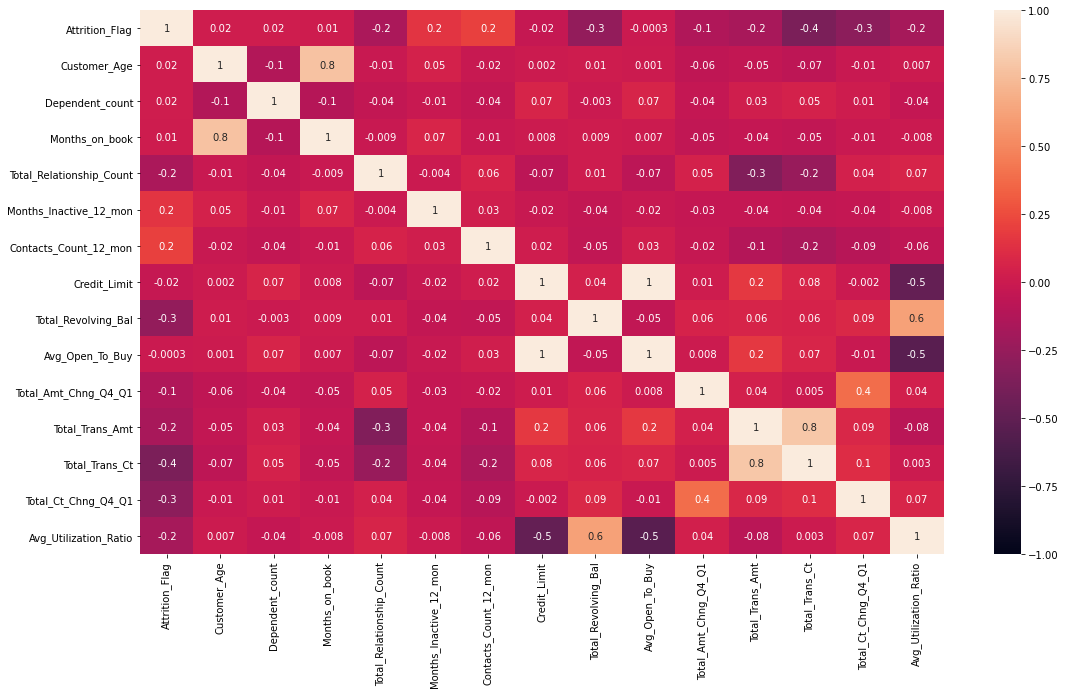

In [14]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Postive correlation between `Contacts_count_12_mon`,`months_inactive_12_mon` and `Attrition_Flag`, shows that customers who contact more, and active shows their interest. Hence higher the engagement of the customer, higher the chance of them continuing the credit card.
* Positive correlation between `Attrition_Flag`, `Customer_age` and `Dependent_count`, which indicates age and dependents do influence on the customers churning
* `Months_on_book` have no correlation
* `Attrition_Flag`, and `Total_trans_ct`, `Total_relvolving_bal`, `Total_relationship_ct`, `Total_ct_chng_q4_q1`, `Avg_utilization_ration` have negative correlation
* There is colinearity between `Customer_Age` and `Months_on_book` and `Total_Trans_amt` and `Total_Trans_ct`. We can drop one of these features in the model building

### 4.1 Univariate Analysis

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

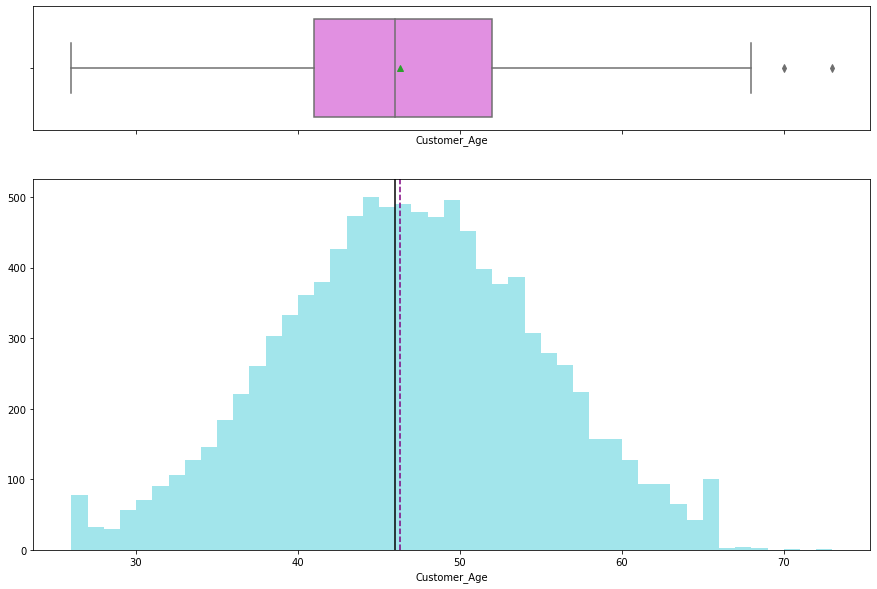

In [16]:
histogram_boxplot(df["Customer_Age"])

Age is normally distributed. Mean and Median is almost the same, close to 46. There are few outliers to the right

In [17]:
df[df['Customer_Age'] >= 70]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
251               0            73      M                0     High School   
254               0            70      M                0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
251                         5                       3                      2   
254                         3                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251       4469.00                 1125          3344.00                  1.36   
254       3252.00                 1495          1757.00                  0.58   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                 1.61   
254             1227              15                 0.88   

     Avg_Utilization_Ratio  
251                   0.25  
254                   0.46

There are 2 customers above the age 70. so, no need to treat the outliers

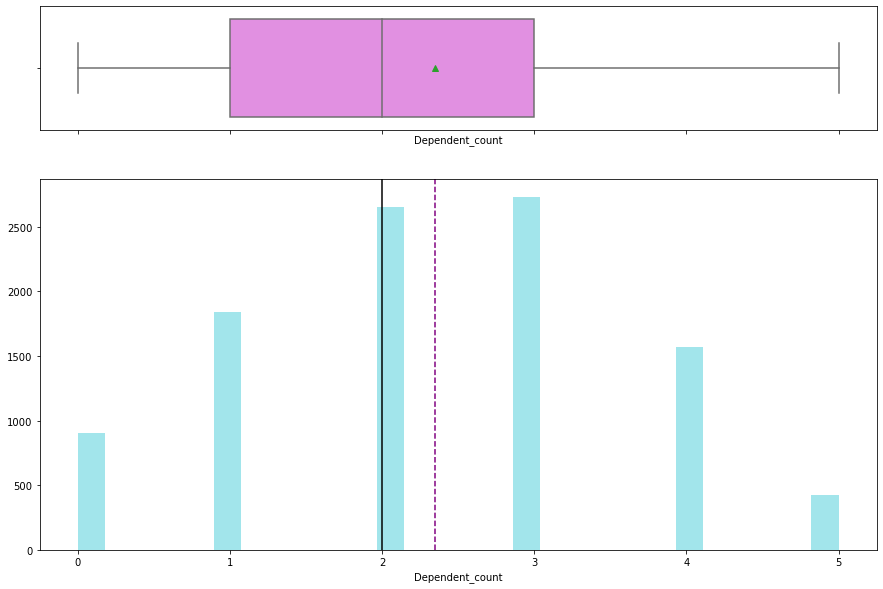

In [18]:
histogram_boxplot(df["Dependent_count"])

`Dependent count` is normally distributed and no outliers

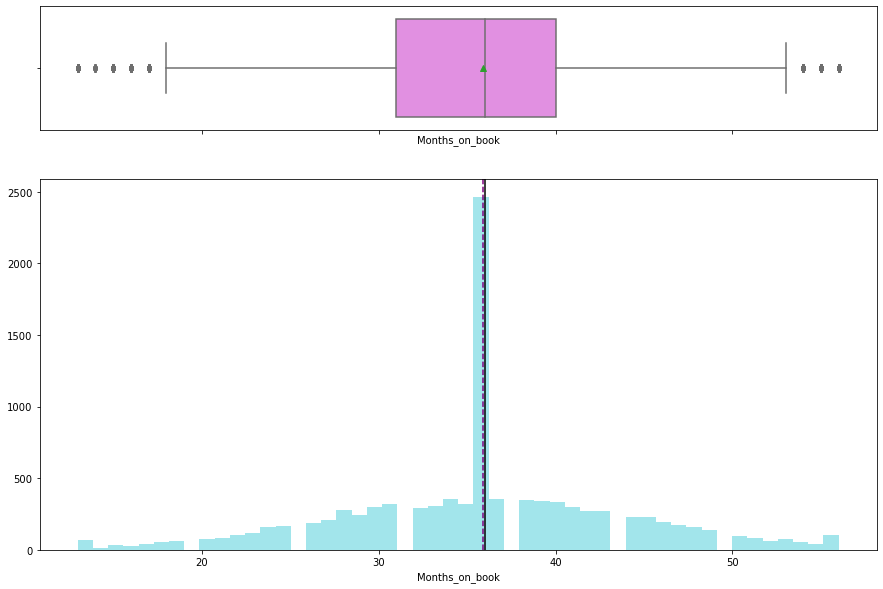

In [19]:
histogram_boxplot(df["Months_on_book"])

`Months_on_book` is normally distributed with few outliers on both sides.These outliers does not seem to be a data entry error

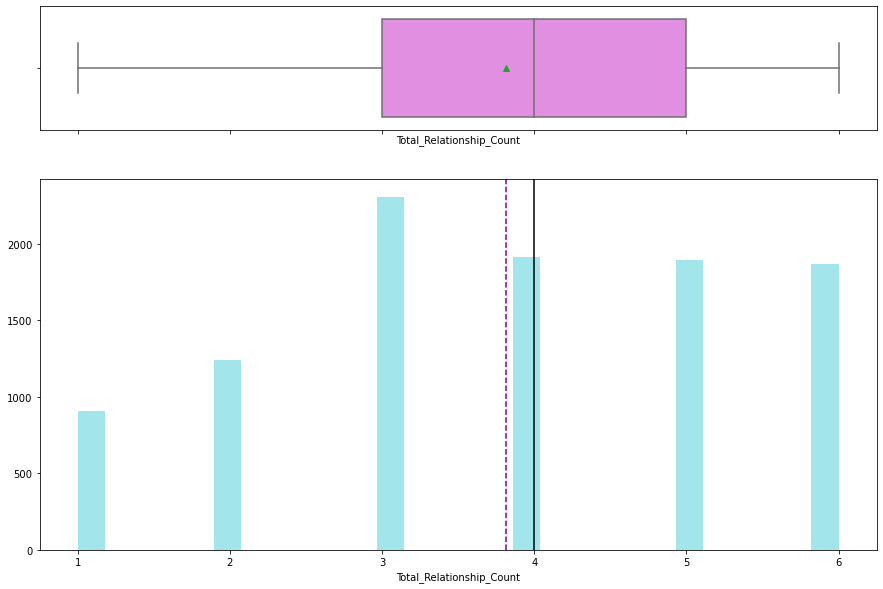

In [20]:
histogram_boxplot(df["Total_Relationship_Count"])

`Total_relationship_count` - Seems evenly distributed and there are no outliers.

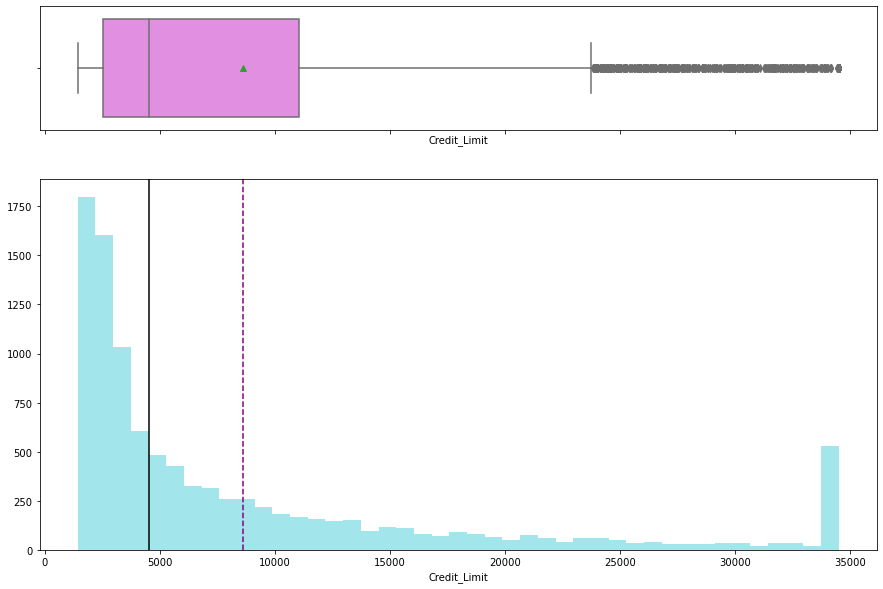

In [21]:
histogram_boxplot(df["Credit_Limit"])

In [22]:
print(df.Credit_Limit.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count   10127.00
mean     8631.95
std      9088.78
min      1438.30
25%      2555.00
50%      4549.00
75%     11067.50
85%     17455.40
90%     23400.20
100%    34516.00
max     34516.00
Name: Credit_Limit, dtype: float64


`Credit_limit` looks to be right-skewed, meaning that the most credit_limit in the dataset are low(Below 4549). There is a significant difference between the mean and the median of the credit limit distribution. The data points are far spread out from the mean, which indicates a high variance in the credit limit.(90% of the credit limits are below 23400, whereas the remaining 10% are between 23400 and 34516.

In [23]:
df[df['Credit_Limit'] > 34000]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
6                   0            51      M                4         Unknown   
45                  0            49      M                4      Uneducated   
61                  1            48      M                2        Graduate   
65                  0            51      M                4      Uneducated   
70                  0            51      M                4        Graduate   
...               ...           ...    ...              ...             ...   
10088               0            45      M                2        Graduate   
10095               0            46      M                3         Unknown   
10098               1            55      M                3        Graduate   
10110               0            56      M                1        Graduate   
10112               1            33      M                2         College   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married         $120K +          Gold              46   
45            Single    $80K - $120K          Blue              30   
61           Married     $60K - $80K        Silver              35   
65            Single    $80K - $120K        Silver              38   
70            Single         $120K +          Blue              42   
...              ...             ...           ...             ...   
10088         Single     $60K - $80K        Silver              33   
10095        Married    $80K - $120K          Blue              33   
10098         Single         $120K +        Silver              36   
10110         Single    $80K - $120K        Silver              49   
10112        Married         $120K +          Gold              20   

       Total_Relationship_Count  Months_Inactive_12_mon  \
6                             6                       1   
45                            3                       2   
61                            2                       4   
65                            4                       1   
70                            3                       2   
...                         ...                     ...   
10088                         4                       2   
10095                         4                       1   
10098                         4                       3   
10110                         5                       2   
10112                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3      34516.00                 2264   
45                         3      34516.00                    0   
61                         4      34516.00                    0   
65                         4      34516.00                 1515   
70                         3      34516.00                 1763   
...                      ...           ...                  ...   
10088                      2      34516.00                 1529   
10095                      3      34516.00                 1099   
10098                      4      34516.00                    0   
10110                      2      34516.00                 1091   
10112                      4      34516.00                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6             32252.00                  1.98             1330              31   
45            34516.00                  1.62             1444              28   
61            34516.00                  0.76              691              15   
65            33001.00                  0.59             1293              32   
70            32753.00                  1.27             1550              41   
...                ...                   ...              ...             ...   
10088         32987.00                  0.61            13940             105   
10095         33417.00                  0.82           

It looks like the above customers still have the max credit limit and have not utilized their card for any transaction as their total revolving balance is either less or 0. Hence outlier treatment is not necessary

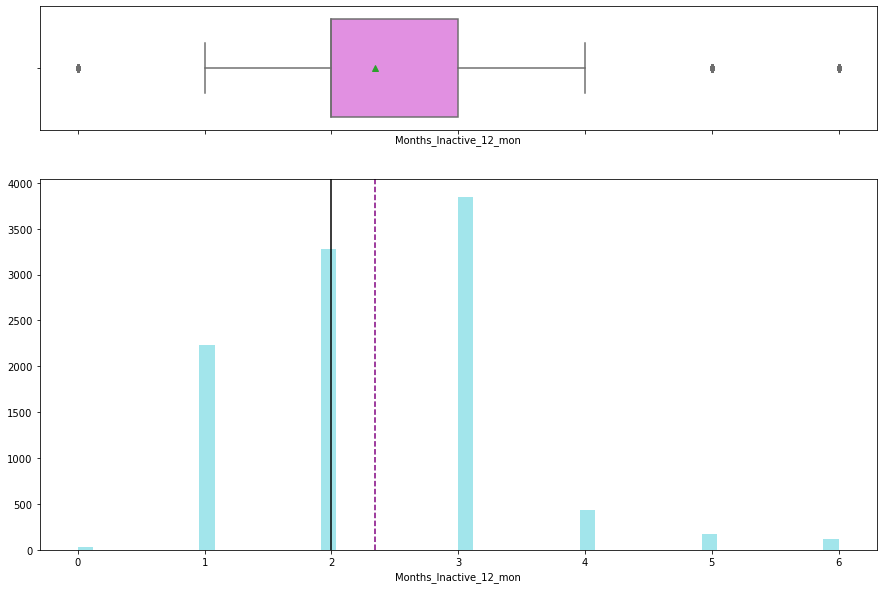

In [24]:
histogram_boxplot(df["Months_Inactive_12_mon"])

`Months_Inactive_12_mon` looks normally distributed with few outliers on both sides

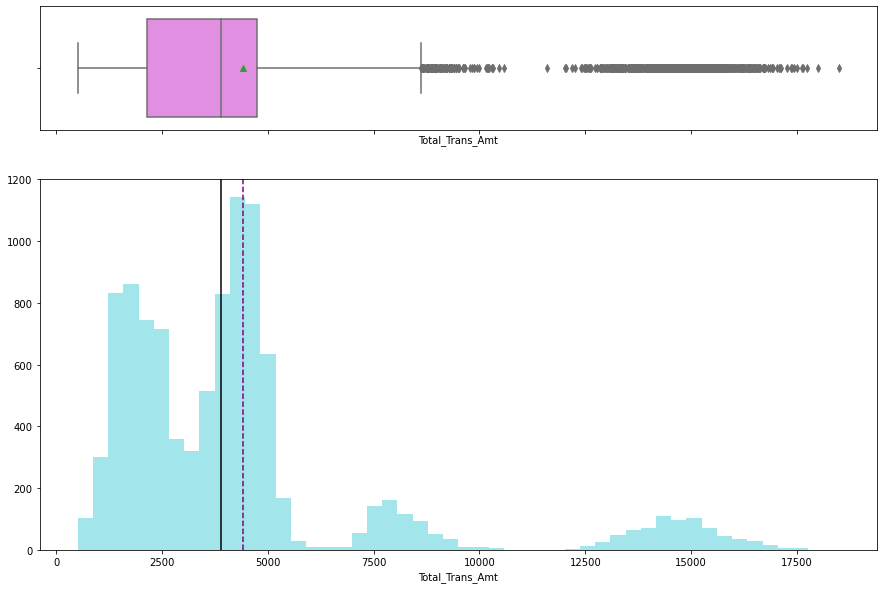

In [25]:
histogram_boxplot(df["Total_Trans_Amt"])

In [26]:
print(df.Total_Trans_Amt.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count   10127.00
mean     4404.09
std      3397.13
min       510.00
25%      2155.50
50%      3899.00
75%      4741.00
85%      5413.30
90%      8212.40
100%    18484.00
max     18484.00
Name: Total_Trans_Amt, dtype: float64


`Total_Trans_Amt` looks to be right-skewed, meaning that the most Total_trans_amt in the dataset are low(Below 3899). There is a big difference between the mean and the median of the total trans amt distribution. The data points are far spread out from the mean, which indicates a high variance in the total trans amt.(90% of the total trans amt are below 8212, whereas the remaining 10% are between 8212 and 18484.

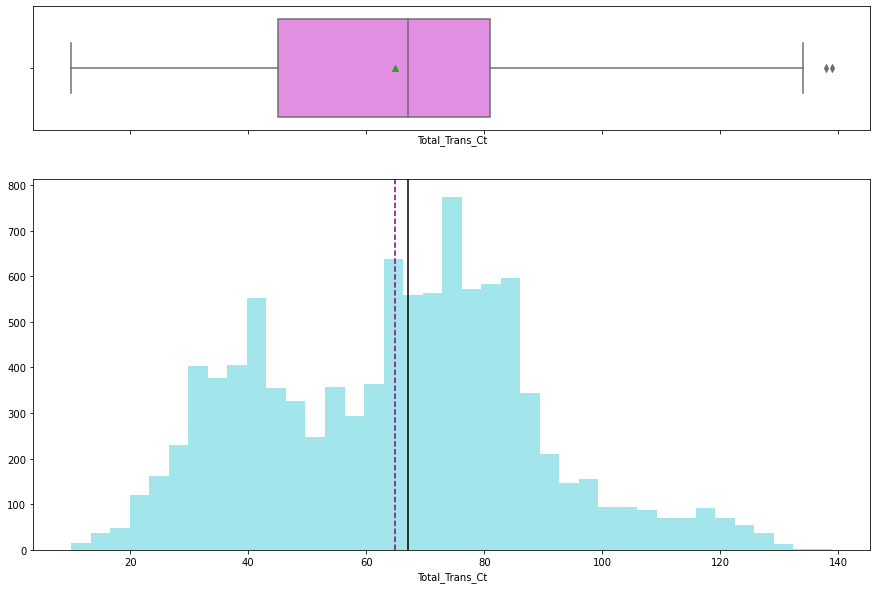

In [27]:
histogram_boxplot(df["Total_Trans_Ct"])

`Total_Trans_ct` is normally distributed with few outliers to the right

In [28]:
df[df["Total_Trans_Ct"] > 135]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9324               0            41      M                3         Unknown   
9586               0            56      F                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married         $120K +          Blue              33   
9586        Married         Unknown          Blue              49   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324      34516.00                  638         33878.00   
9586      17542.00                 2517         15025.00   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324                  0.72            13085             139   
9586                  0.80            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324                 0.68                   0.02  
9586                 0.79                   0.14

Did not seem like a data entry error. So no outlier treatment required

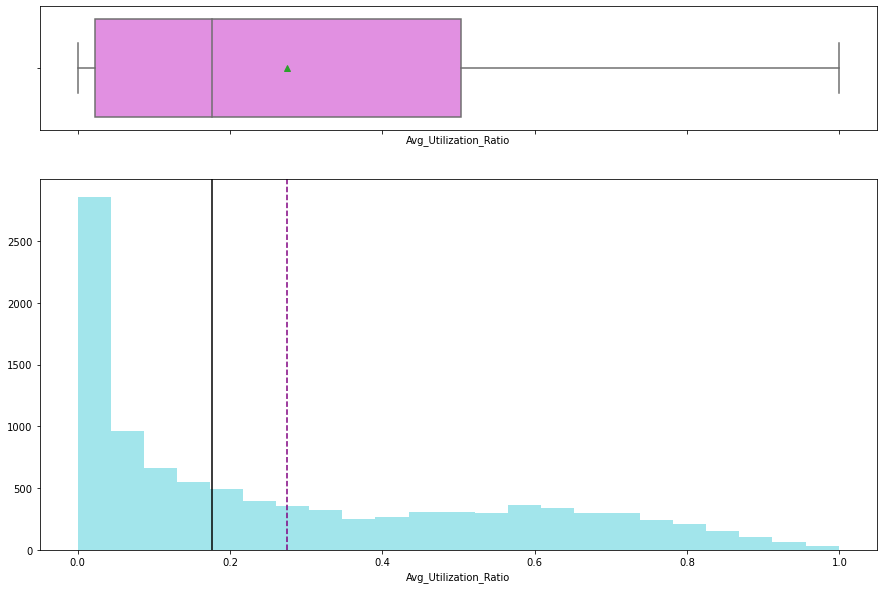

In [29]:
histogram_boxplot(df["Avg_Utilization_Ratio"])

In [30]:
print(df.Avg_Utilization_Ratio.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count   10127.00
mean        0.27
std         0.28
min         0.00
25%         0.02
50%         0.18
75%         0.50
85%         0.64
90%         0.71
100%        1.00
max         1.00
Name: Avg_Utilization_Ratio, dtype: float64


`Avg_utilization_Ratio` is right skewed. 50% of avg utilization ration is below 0.18

In [31]:
# Function to create bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

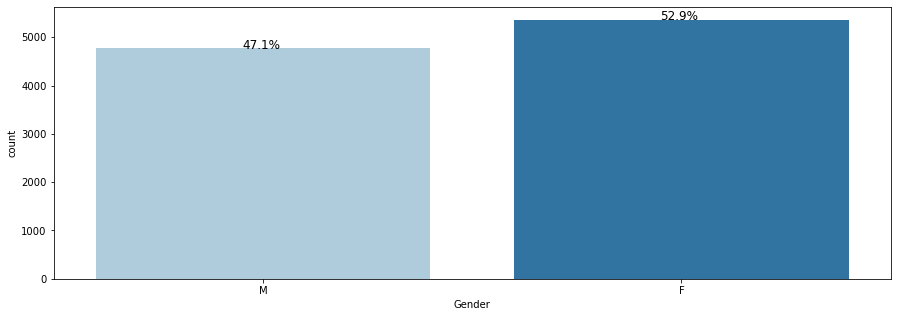

In [32]:
perc_on_bar('Gender')

52.9% of the customers are Female

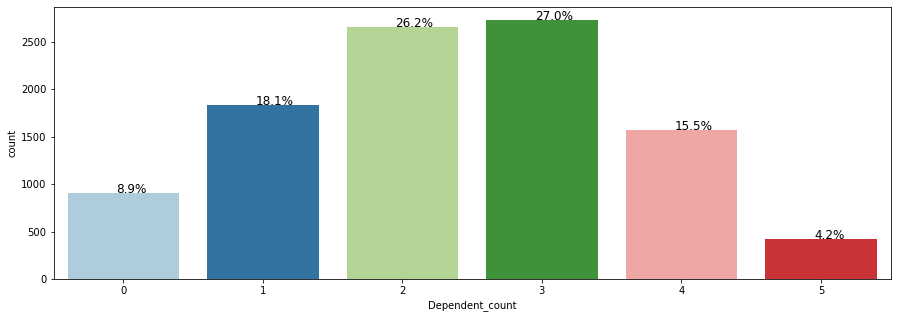

In [33]:
perc_on_bar('Dependent_count')

27% of customers have 3 dependants

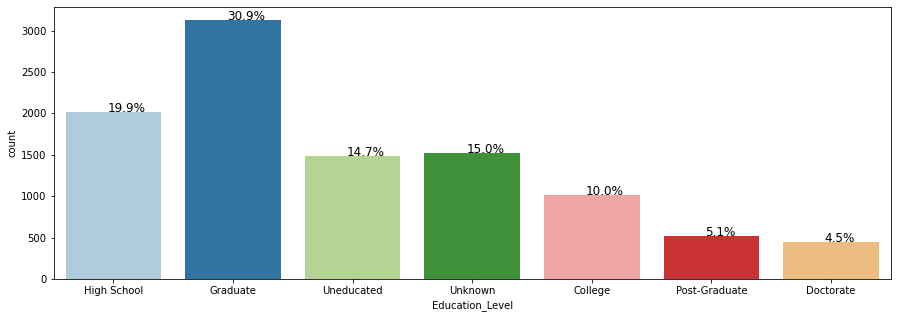

In [34]:
perc_on_bar('Education_Level')

30.9% customers have graduate level education followed by high school which is 19.9%

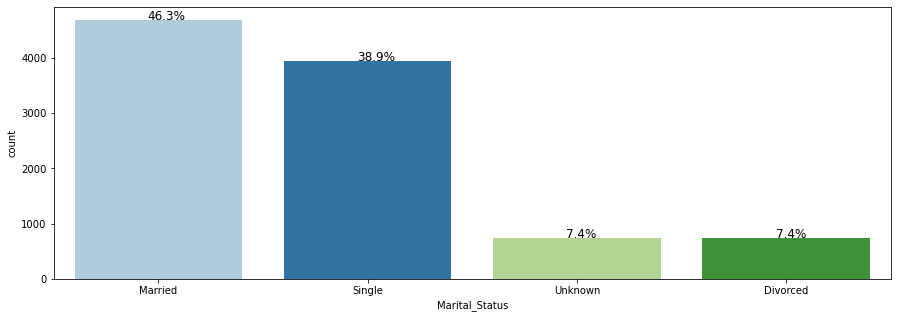

In [35]:
perc_on_bar('Marital_Status')

46.3% customers are married

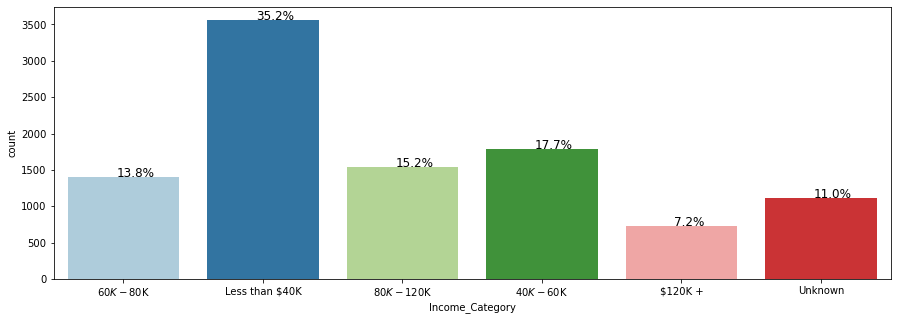

In [36]:
perc_on_bar('Income_Category')

Majority(35.2%) customers fall under income category less than $40K. It shows most of the customers in the dataset are low income earners

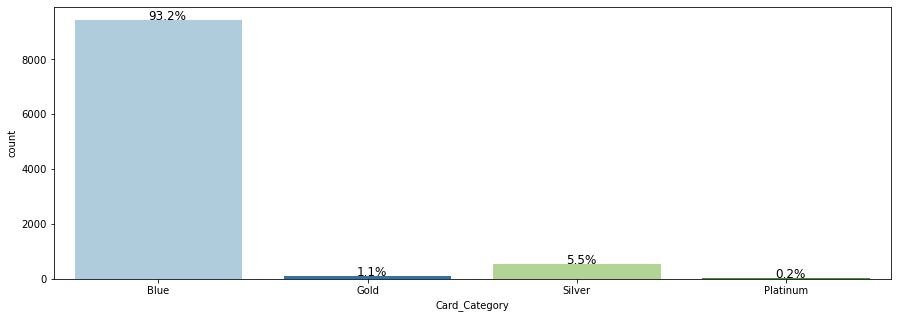

In [37]:
perc_on_bar('Card_Category')

93.2% customers falls under blue card category. seems to coincide with the income category of the customers

### 4.2 Bivariate Analysis

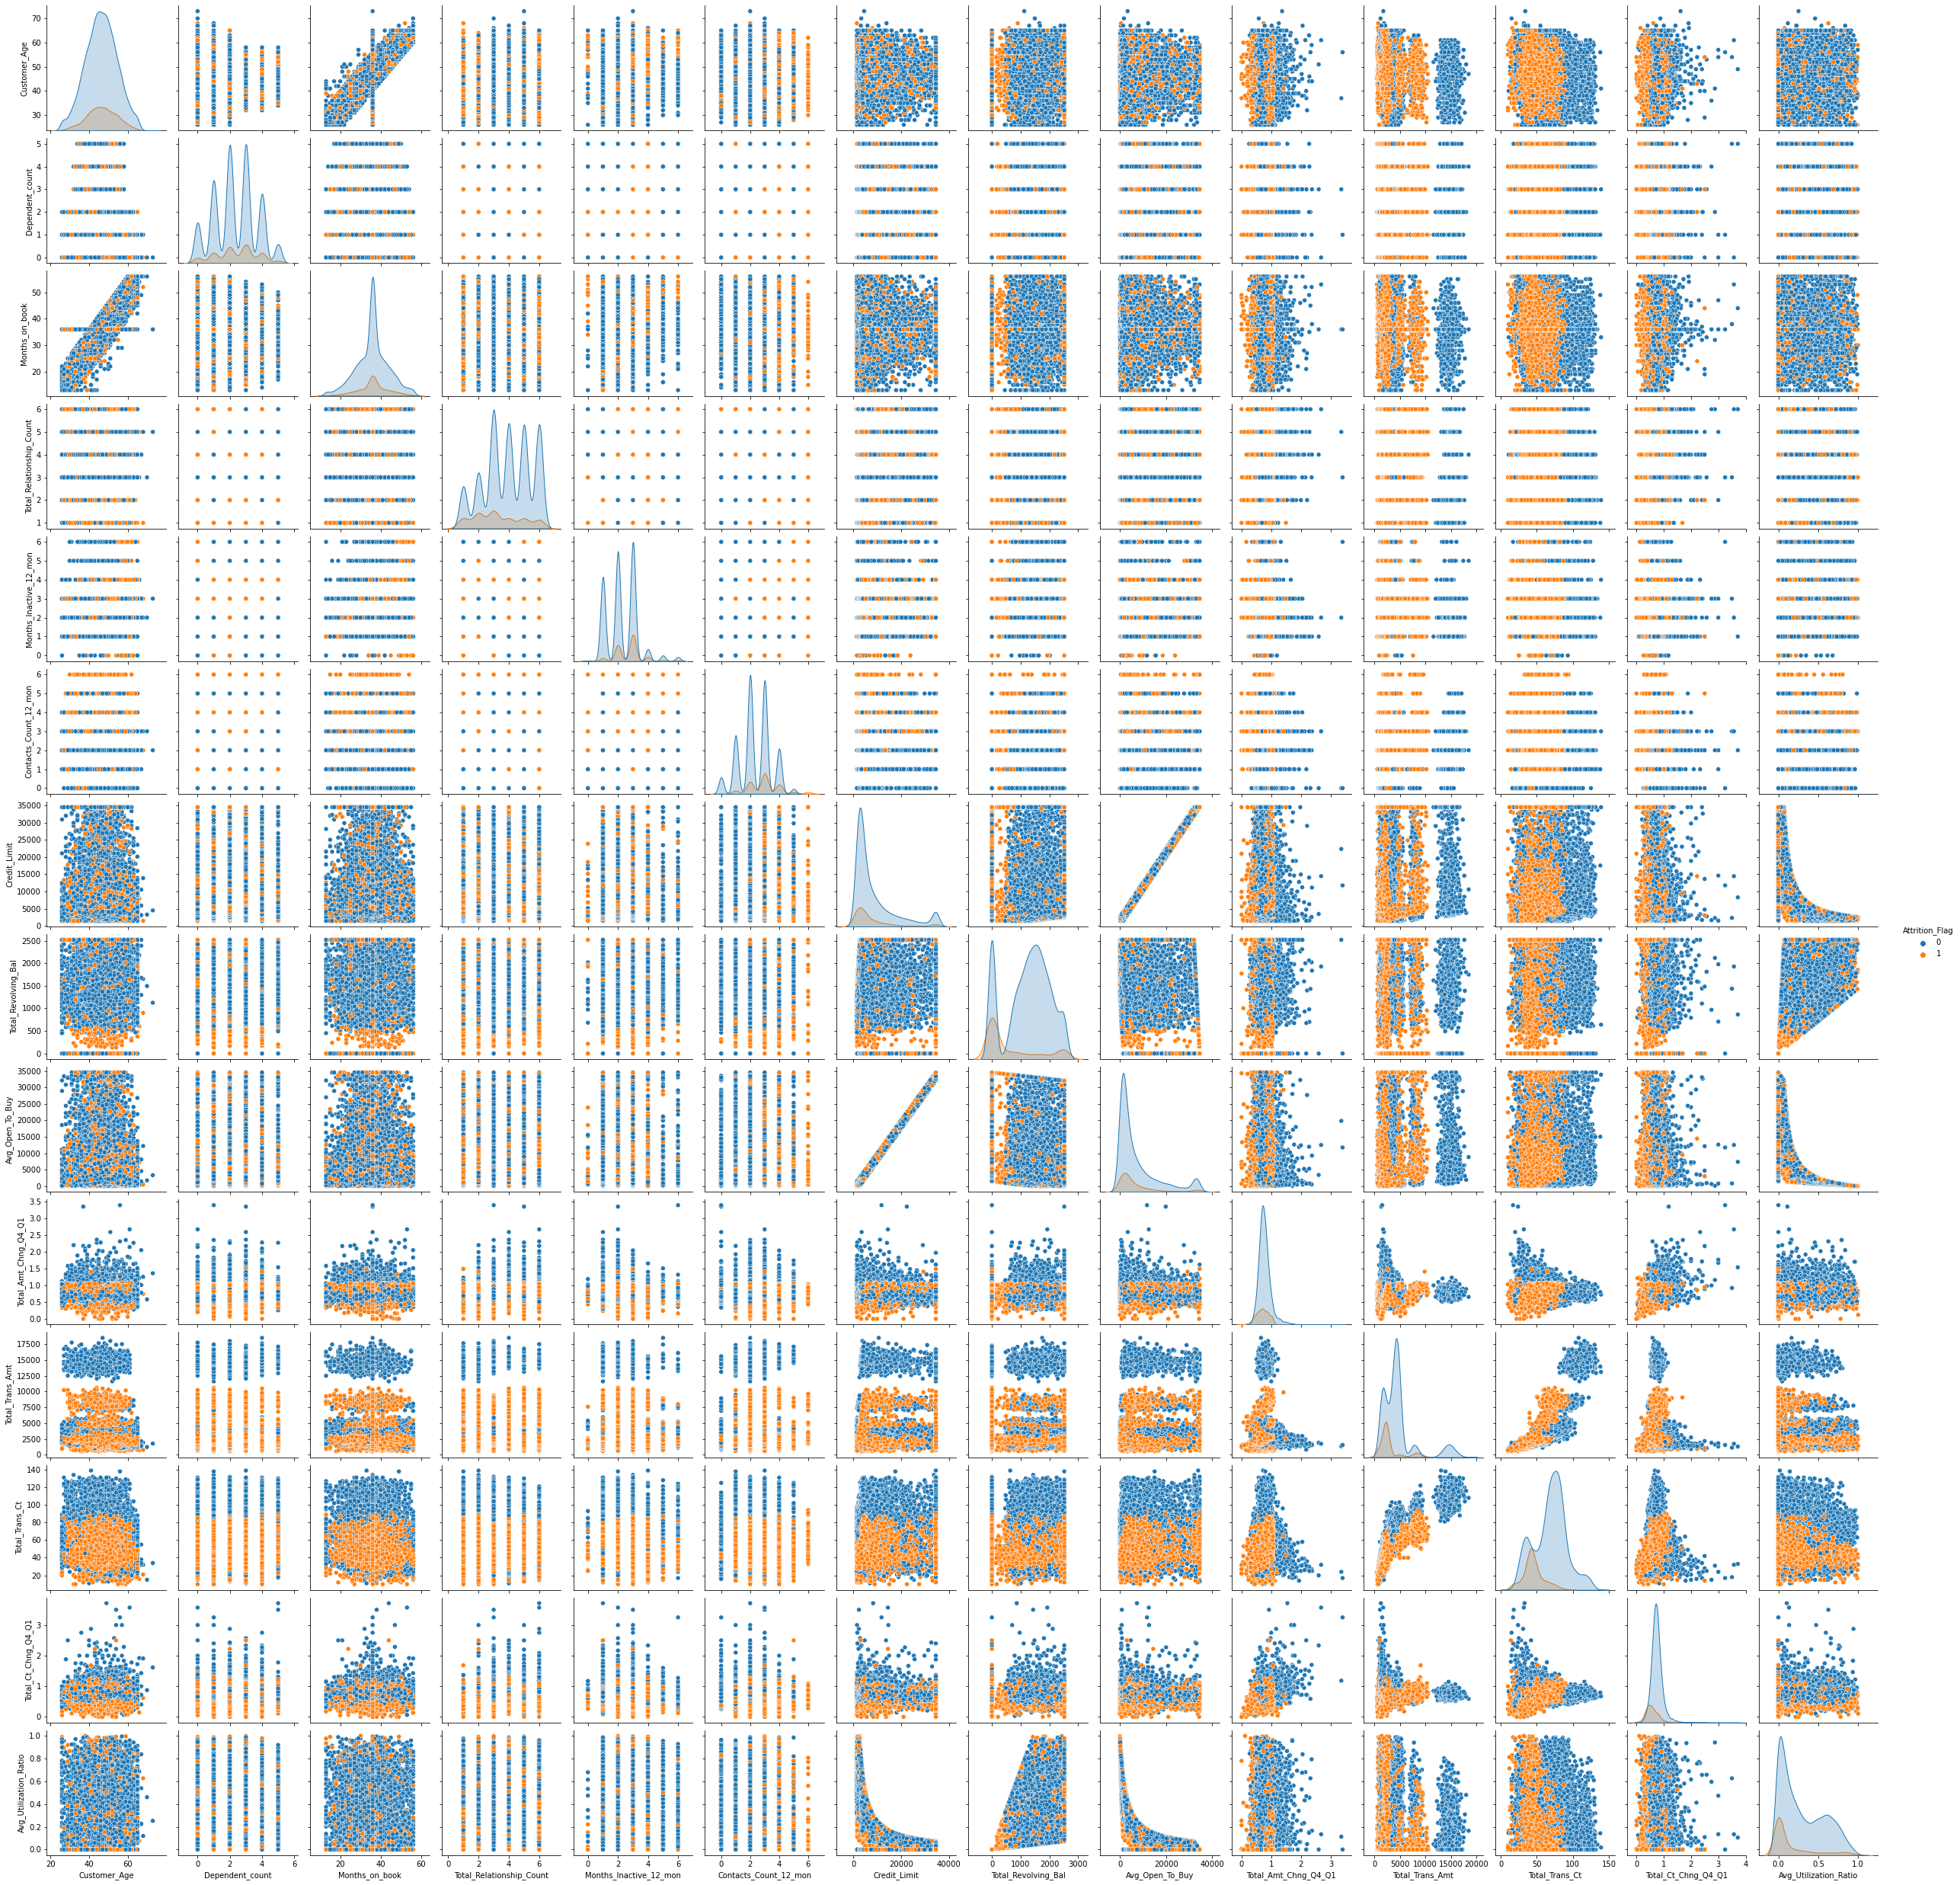

In [38]:
sns.pairplot(df, hue="Attrition_Flag")
plt.show()

* There are varying distributions in variables for Attrition_Flag, we should investigate it further.

In [39]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Attrition vs Gender

Attrition_Flag     0     1    All
Gender                           
F               4428   930   5358
M               4072   697   4769
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


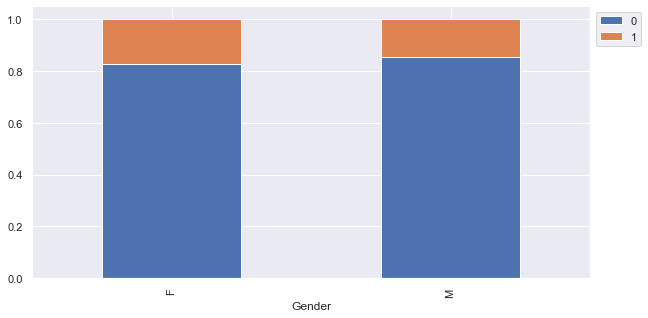

In [40]:
stacked_plot(df['Gender'])

* Data suggests that female customers have attrired more than male customers

#### Attrition vs Education Level

Attrition_Flag      0     1    All
Education_Level                   
College           859   154   1013
Doctorate         356    95    451
Graduate         2641   487   3128
High School      1707   306   2013
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


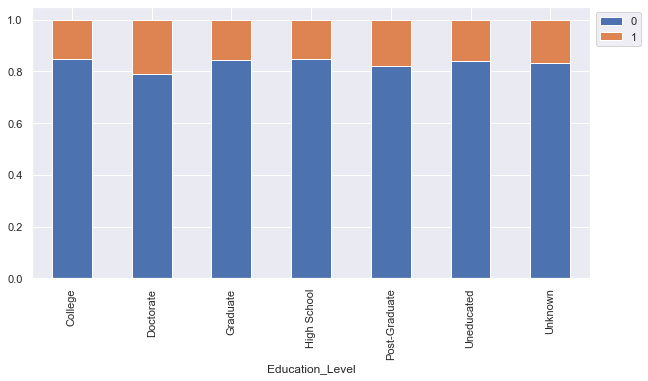

In [41]:
stacked_plot(df['Education_Level'])

* Doctorate customers have seen more churning, followed by post-graduates

#### Attrition vs Card category

Attrition_Flag     0     1    All
Card_Category                    
Blue            7917  1519   9436
Gold              95    21    116
Platinum          15     5     20
Silver           473    82    555
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


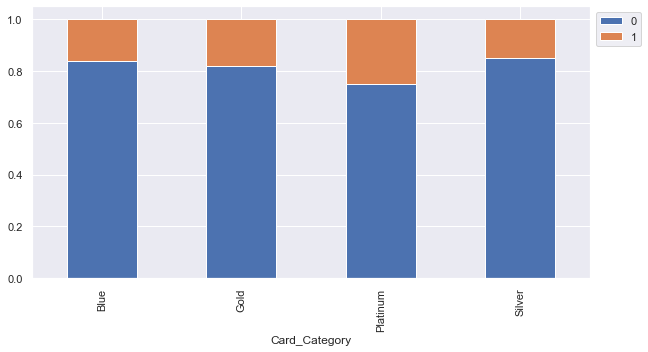

In [42]:
stacked_plot(df['Card_Category'])

* Platinum card category customers have churned more, 5 out of 20. Followed by  gold customers

#### Attrition vs Income category

Attrition_Flag      0     1    All
Income_Category                   
$120K +           601   126    727
$40K - $60K      1519   271   1790
$60K - $80K      1213   189   1402
$80K - $120K     1293   242   1535
Less than $40K   2949   612   3561
Unknown           925   187   1112
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


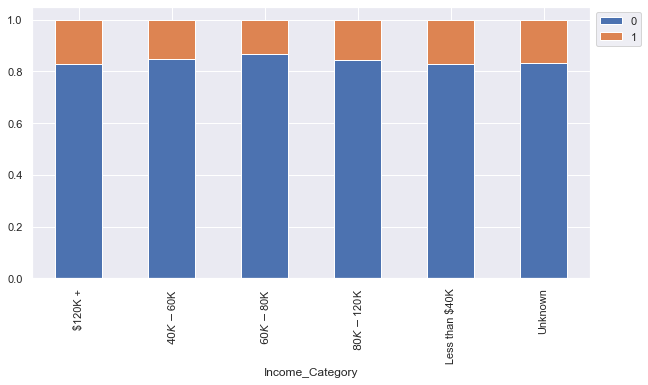

In [43]:
stacked_plot(df['Income_Category'])

* Majority of the churned customers falls under either $120K+ or less than 40K income category

#### Attrition vs Marital status

Attrition_Flag     0     1    All
Marital_Status                   
Divorced         627   121    748
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


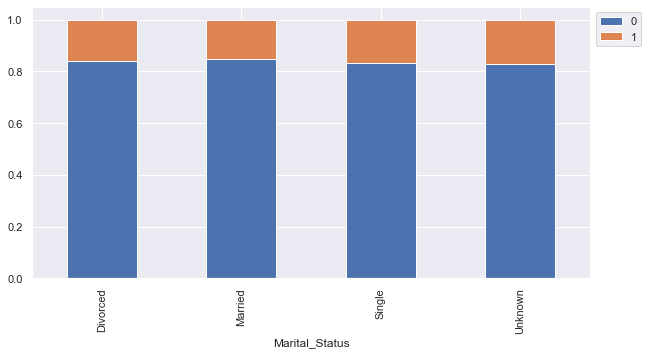

In [44]:
stacked_plot(df['Marital_Status'])

* Single and divorced customers have attrited more

<AxesSubplot:xlabel='Gender', ylabel='Dependent_count'>

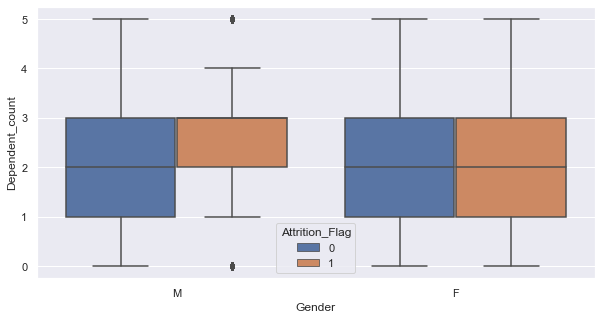

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender",y="Dependent_count",hue="Attrition_Flag", data = df)

The above chart shows that among the female customers, the dependent count did not influence the attrition. However, with male customers, the churning happens with depenendent count between 2 and 3

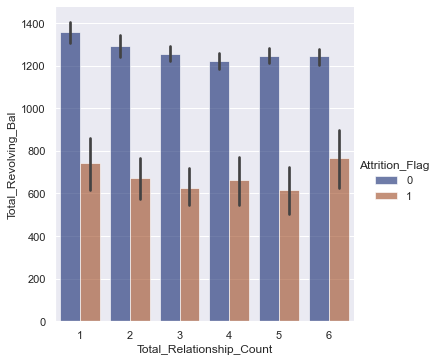

In [46]:
sns.catplot(
    data=df, kind="bar",
    x="Total_Relationship_Count", y="Total_Revolving_Bal", hue="Attrition_Flag",
    palette="dark", alpha=.6, height=5)

Total relationship count with less than 800 total revolving balance have seen more churning

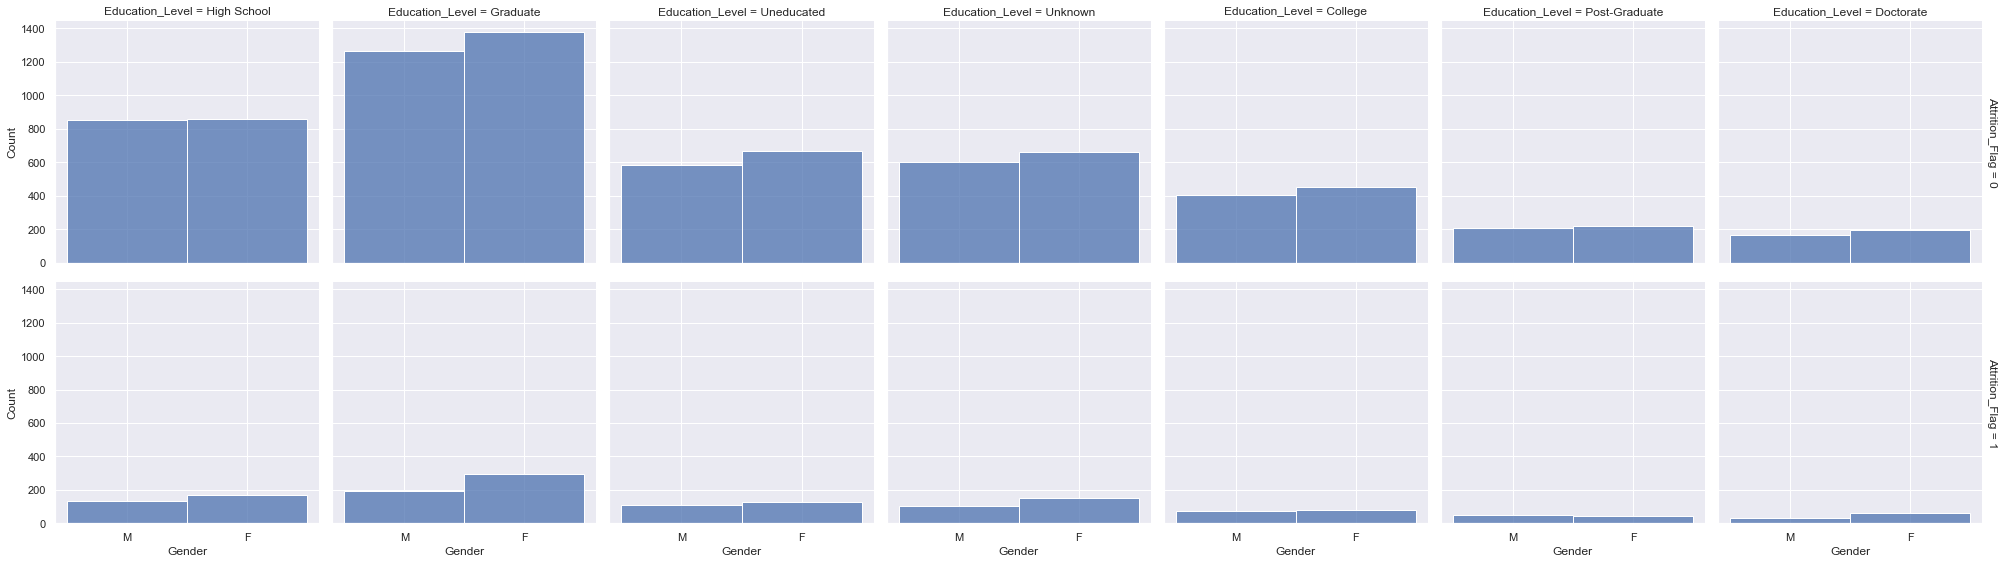

In [47]:
sns.displot(
    df, x="Gender", col="Education_Level", row="Attrition_Flag",
    binwidth=4, height=4, facet_kws=dict(margin_titles=True))

Female customers with graduate level education have seen more attrition compared to male. Second highest is high school educated female customers

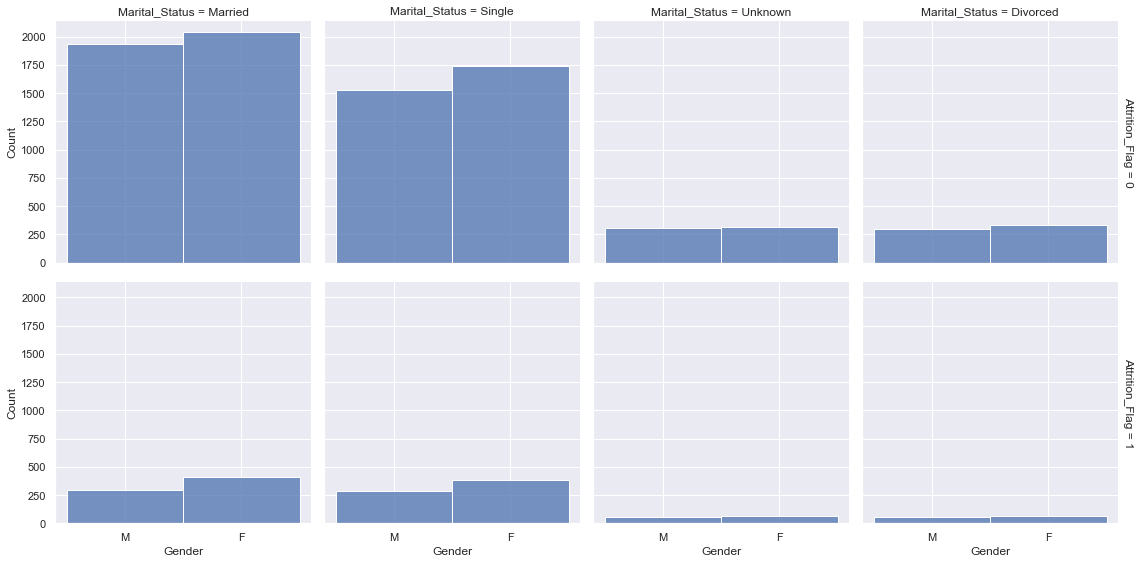

In [48]:
sns.displot(
    df, x="Gender", col="Marital_Status", row="Attrition_Flag",
    binwidth=4, height=4, facet_kws=dict(margin_titles=True))

Single and married female customers have churned more.

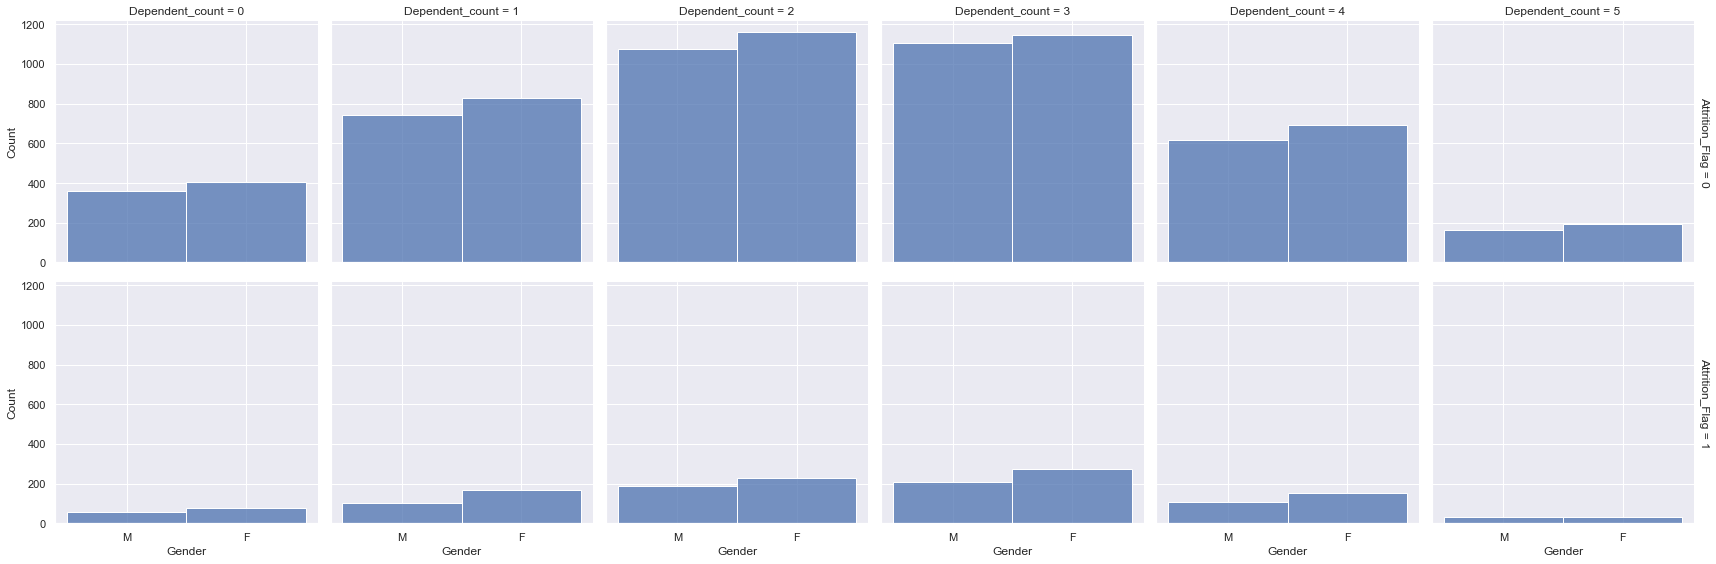

In [49]:
sns.displot(
    df, x="Gender", col="Dependent_count", row="Attrition_Flag",
    binwidth=4, height=4, facet_kws=dict(margin_titles=True))

Female customers with dependent count 2 and 3 have seen more churning

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

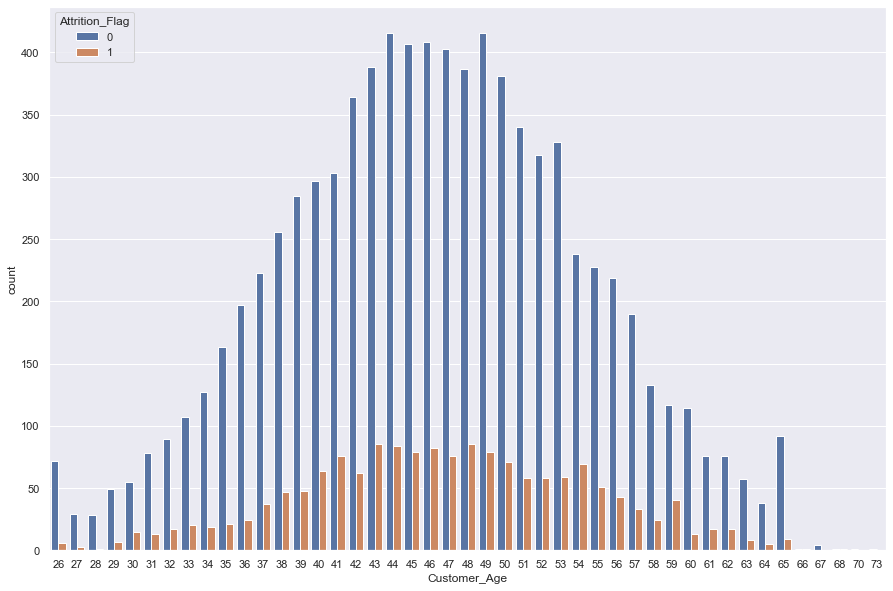

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x="Customer_Age", hue="Attrition_Flag", data=df)


There is no specific pattern exist with age and churning. It seems evenly distributed.

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

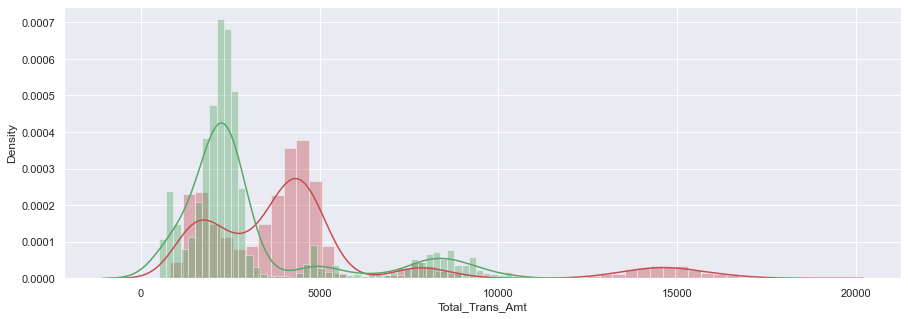

In [51]:
plt.figure(figsize=(15,5))

sns.distplot( df[df.Attrition_Flag == 0]['Total_Trans_Amt'], color = 'r')
sns.distplot( df[df.Attrition_Flag == 1]['Total_Trans_Amt'], color = 'g')

Cutomers who have churned tend to fall under less than 10000 total trans amount range. More prominently with less than 5000 total trans amount category. It indicates these customers are of low income category with more dependents

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

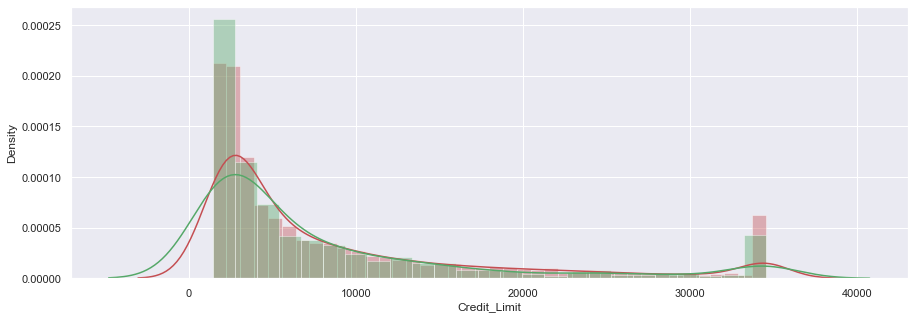

In [52]:
plt.figure(figsize=(15,5))

sns.distplot( df[df.Attrition_Flag == 0]['Credit_Limit'], color = 'r')
sns.distplot( df[df.Attrition_Flag == 1]['Credit_Limit'], color = 'g')

Above graph shows customers who have churned and who have not churned both fall under the same credit limit category. However, there are more customers who have churned who happen to fall between 1000 and 3000 credit limit range.

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Density'>

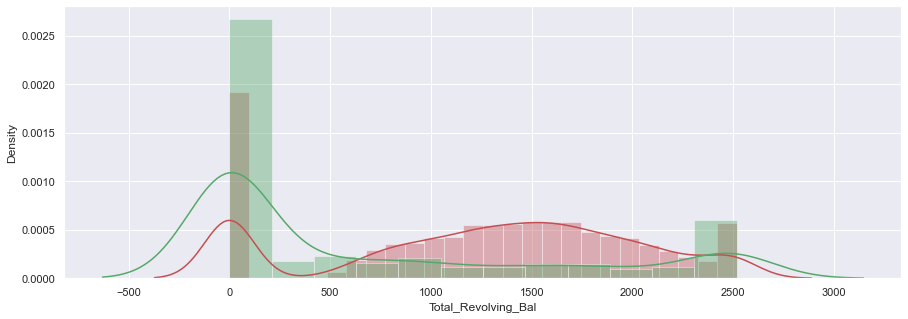

In [53]:
plt.figure(figsize=(15,5))

sns.distplot( df[df.Attrition_Flag == 0]['Total_Revolving_Bal'], color = 'r')
sns.distplot( df[df.Attrition_Flag == 1]['Total_Revolving_Bal'], color = 'g')

Above graph shows more customers churning with less than 500 total revolving balance. It confirms the view that these are low income customers.

# 5. <a id = "link5"></a>Data Pre-processing

### 5.1 Missing-Value Treatment

* There are 'Unknown' values in `Education_level`, `Marital_Status`, and `Income_Category`
* We will use KNN imputer to impute 'Unknown' values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces Unknown values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [54]:
imputer = KNNImputer(n_neighbors=5)

In [55]:
reqd_col_for_impute = ['Education_Level','Marital_Status','Income_Category']

In [56]:
df[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School        Unknown  Less than $40K
4      Uneducated        Married     $60K - $80K

Before replacing the `Unknown` values. I am converting these unknown values to `Nan`

In [57]:
df['Marital_Status'].replace('Unknown', np.nan, inplace=True)
df['Education_Level'].replace('Unknown', np.nan, inplace=True)
df['Income_Category'].replace('Unknown', np.nan, inplace=True)

In [58]:
df1=df.copy()

we need to pass numerical values for each categorical column for KNN imputation so we will label encode them

In [59]:
Marital_Status = {'Married':0,'Single':1,'Divorced':2}
df1['Marital_Status'] = df1['Marital_Status'].map(Marital_Status)
Education_Level = {'Uneducated':0, 'High School':1, 'College':2, 'Graduate' :3 ,'Post-Graduate':4, 'Doctorate':5}
df1['Education_Level'] = df1['Education_Level'].map(Education_Level)
Income_Category = {'Less than $40K':0,'$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3,  '$120K +':4}
df1['Income_Category'] = df1['Income_Category'].map(Income_Category)

In [60]:
df1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0               0            45      M                3             1.00   
1               0            49      F                5             3.00   
2               0            51      M                3             3.00   
3               0            40      F                4             1.00   
4               0            40      M                3             0.00   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0            0.00             2.00          Blue              39   
1            1.00             0.00          Blue              44   
2            0.00             3.00          Blue              36   
3             nan             0.00          Blue              34   
4            0.00             2.00          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      12691.00                  777         11914.00                  1.33   
1       8256.00                  864          7392.00                  1.54   
2       3418.00                    0          3418.00                  2.59   
3       3313.00                 2517           796.00                  1.41   
4       4716.00                    0          4716.00                  2.17   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                 1.62                   0.06  
1             1291              33                 3.71                   0.10  
2             1887              20                 2.33                   0.00  
3             1171              20                 2.33                   0.76  
4              816              28                 2.50                   0.00

* Values have been encoded.

### 5.2 Split Data

In [61]:
X = df1.drop(['Attrition_Flag'],axis=1)
y = df1['Attrition_Flag']

In [63]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


### 5.3 Imputing Unknown/NaN Values

In [64]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [65]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

All missing values have been treated.
Let's inverse map the encoded values.

In [68]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [69]:
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Income_Category,'Income_Category')

* Checking inverse mapped values/categories.

In [71]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2275
College          1557
High School      1539
Uneducated       1032
Post-Graduate     363
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3549
Single      3001
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2496
$40K - $60K       1774
$60K - $80K       1204
$80K - $120K      1110
$120K +            504
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [72]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1605
M    1434
Name: Gender, dtype: int64
******************************
Graduate         953
High School      694
College          639
Uneducated       455
Post-Graduate    169
Doctorate        129
Name: Education_Level, dtype: int64
******************************
Married     1570
Single      1259
Divorced     210
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1086
$40K - $60K        715
$60K - $80K        585
$80K - $120K       430
$120K +            223
Name: Income_Category, dtype: int64
******************************
Blue        2817
Silver       182
Gold          35
Platinum       5
Name: Card_Category, dtype: int64
******************************


### 5.4 Encoding categorical variables

In [73]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


In [74]:
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
5672            35                3              30                         5   
3138            48                0              36                         3   
856             46                2              34                         3   
7365            44                5              30                         3   
8685            43                3              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
5672                       3                      4      13590.00   
3138                       1                      0       2708.00   
856                        3                      3       2925.00   
7365                       3                      1       2709.00   
8685                       3                      0       7350.00   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
5672                 1528         12062.00                  0.73  ...   
3138                 2517           191.00                  0.57  ...   
856                  2365           560.00                  0.69  ...   
7365                 1726           983.00                  0.70  ...   
8685                 1360          5990.00                  0.74  ...   

      Education_Level_Uneducated  Marital_Status_Married  \
5672                           0                       1   
3138                           0                       0   
856                            0                       1   
7365                           0                       0   
8685                           0                       1   

      Marital_Status_Single  Income_Category_$40K - $60K  \
5672                      0                            0   
3138                      0                            1   
856                       0                            0   
7365                      1                            0   
8685                      0                            0   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
5672                            0                             1   
3138                            0                             0   
856                             0                             1   
7365                            0                             0   
8685                            0                             0   

      Income_Category_Less than $40K  Card_Category_Gold  \
5672                               0                   0   
3138                               0                   0   
856                                0                   0   
7365                               1                   0   
8685                               1                   0   

      Card_Category_Platinum  Card_Category_Silver  
5672                       0                     0  
3138                       0                     0  
856                        0                     0  
7365                       0                     0  
8685                       0                     0  

[5 rows x 29 columns]

# 6. <a id = "link6"></a>Model Building

### 6.1 Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will churn but actually the customer did not churn - False Positive(Type 1 Error)
2. Predicting a customer will not churn but actually, the customer did churn - False Negative(Type 2 Error)

#### Which case is more important? 
* Both the cases are important as cost of being wrong is high:

* If we predict a customer will churn but actually the customer did not churn the bank has failed to identify potential customers which will be adversarial.

* If we predict a customer will not churn but actually the customer did churn, then the bank has targetted the wrong customers.

#### How to reduce this loss i.e need to reduce both False Negatives and False Positives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

### 6.2 Create function to calculate the confusion matrix and performance metrics

In [75]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    train_f1 = metrics.f1_score(train_y,pred_train)
    test_f1 = metrics.f1_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("F1 on training set : ",metrics.f1_score(train_y,pred_train))
        print("F1 on test set : ",metrics.f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [76]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 7. <a id = "link7"></a>Model building - Logistic Regression

In [77]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

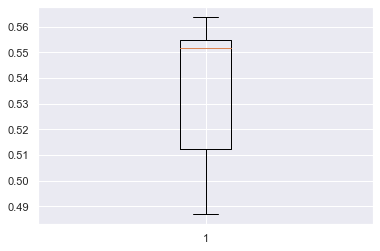

In [78]:
scoring='f1'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.49 to 0.56 F1.
* Let's check the performance on test data.

Accuracy on training set :  0.8817720090293454
Accuracy on test set :  0.8805528134254689
Recall on training set :  0.46444249341527655
Recall on test set :  0.44672131147540983
Precision on training set :  0.6988110964332893
Precision on test set :  0.7009646302250804
F1 on training set :  0.5580168776371308
F1 on test set :  0.5456821026282854


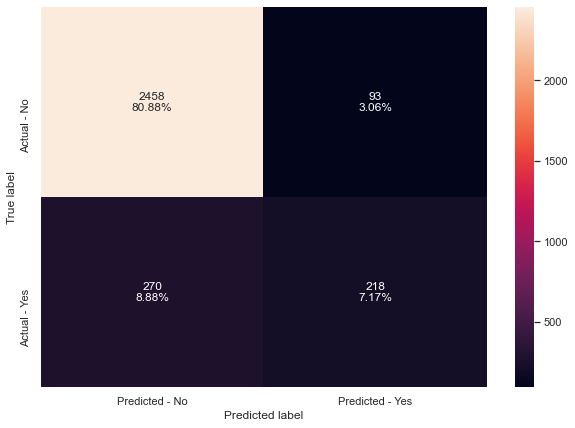

In [79]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* F1 is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### 7.1 Oversampling train data using SMOTE

In [81]:
print("Before UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train_over==0)))
print("After UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train_over==1)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Existing Customer': 5949
Before UpSampling, counts of label 'Attrited Customer': 1139 

After UpSampling, counts of label 'Existing Customer': 5949
After UpSampling, counts of label 'Attrited Customer': 5949 

After UpSampling, the shape of train_X: (11898, 29)
After UpSampling, the shape of train_y: (11898,) 



### 7.2 Logistic Regression on oversampled data

In [82]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

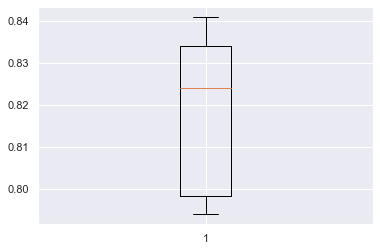

In [83]:
scoring='f1'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.80 to 0.84, which is an improvement from the previous model
* Let's check the performance on the test set.

Accuracy on training set :  0.8024878130778282
Accuracy on test set :  0.7999341888779203
Recall on training set :  0.8036644814254497
Recall on test set :  0.7745901639344263
Precision on training set :  0.8017776287103807
Precision on test set :  0.4315068493150685
F1 on training set :  0.8027199462726663
F1 on test set :  0.5542521994134897


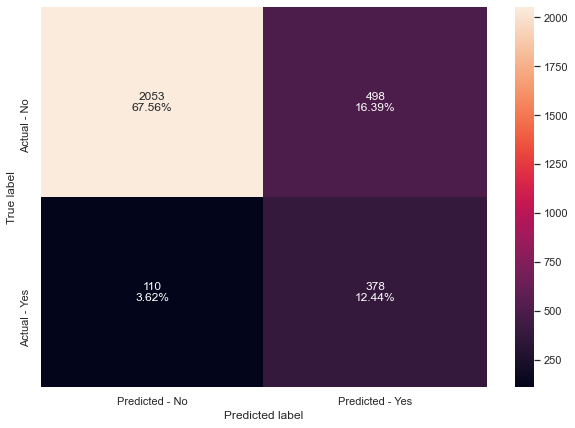

In [84]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Performance on the training set improved but the model is not able to replicate the same for the test set.Model is overfitting. Lets try:

  a. Regularization to see if overfitting can be reduced

  b. Undersampling the train to handle the imbalance between classes and check the model performance.

### 7.3 Regularization

In [85]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='f1')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7050764834425954
Accuracy on test set :  0.8042119118130964
Recall on training set :  0.5690031938140864
Recall on test set :  0.5512295081967213
Precision on training set :  0.7817551963048499
Precision on test set :  0.4170542635658915
F1 on training set :  0.6586243798034829
F1 on test set :  0.4748455428067079


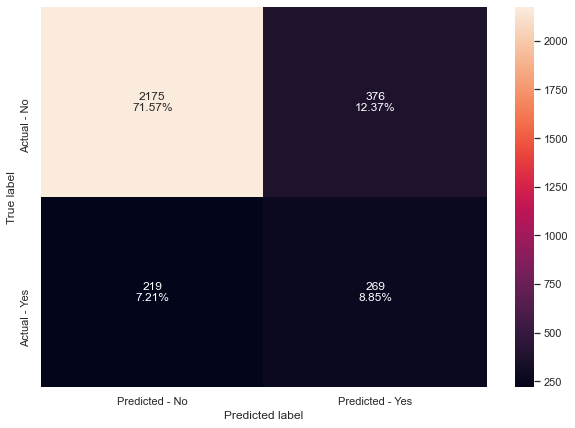

In [86]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, overfitting has reduced to some extent and the model is also performing well.
* Let's try undersampling now.

### 7.4 Undersampling train data using SMOTE

In [87]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [88]:
print("Before Under Sampling, counts of label 'Existing Customer': {}".format(sum(y_train==0)))
print("Before Under Sampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train==1)))

print("After Under Sampling, counts of label 'Existing Customer': {}".format(sum(y_train_un==0)))
print("After Under Sampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train_un==1)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Existing Customer': 5949
Before Under Sampling, counts of label 'Attrited Customer': 1139 

After Under Sampling, counts of label 'Existing Customer': 1139
After Under Sampling, counts of label 'Attrited Customer': 1139 

After Under Sampling, the shape of train_X: (2278, 29)
After Under Sampling, the shape of train_y: (2278,) 



### 7.4 Logistic Regression on undersampled data

In [89]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

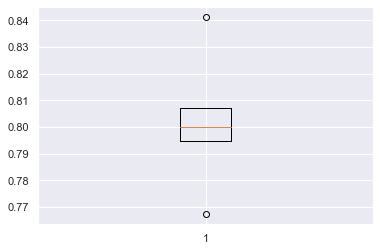

In [90]:
scoring='f1'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.77 to 0.84, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the test set.

Accuracy on training set :  0.8143107989464442
Accuracy on test set :  0.8134254689042448
Recall on training set :  0.8314310798946444
Recall on test set :  0.8319672131147541
Precision on training set :  0.8039049235993209
Precision on test set :  0.4556677890011223
F1 on training set :  0.8174363400949504
F1 on test set :  0.5888324873096447


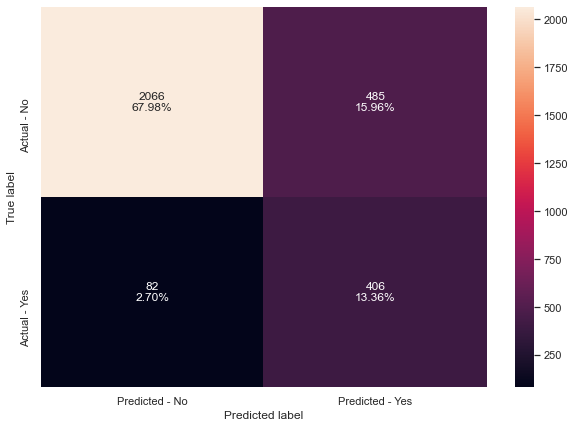

In [91]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved using downsampling. However it still looks to be overfitting

In [92]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [93]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [94]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [95]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,'Test_F1':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression            0.88   
1            Logistic Regression on Oversampled data            0.80   
2  Logistic Regression-Regularized (Oversampled d...            0.71   
3           Logistic Regression on Undersampled data            0.81   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0           0.88          0.46         0.45             0.70            0.70   
1           0.80          0.80         0.77             0.80            0.43   
2           0.80          0.57         0.55             0.78            0.42   
3           0.81          0.83         0.83             0.80            0.46   

   Train_F1  Test_F1  
0      0.56     0.55  
1      0.80     0.55  
2      0.66     0.47  
3      0.82     0.59

Logistic regression model on undersampled data has given highest recall on test data. This model performed well on accuracy, recall and precision as well.

# 8. <a id = "link8"></a>Model building - Bagging and Boosting

### 8.1 Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9223428759460349
Recall on training set :  1.0
Recall on test set :  0.7684426229508197
Precision on training set :  1.0
Precision on test set :  0.7530120481927711
F1 on training set :  1.0
F1 on test set :  0.7606490872210953


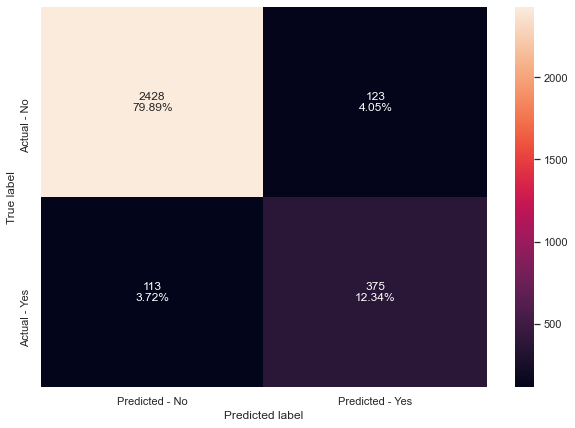

In [96]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

scores_DT = get_metrics_score(d_tree,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Decision tree is overfitting the training data. It's not able to identify 24% of categories correctly

### 8.2 Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9545903257650543
Recall on training set :  1.0
Recall on test set :  0.7684426229508197
Precision on training set :  1.0
Precision on test set :  0.9375
F1 on training set :  1.0
F1 on test set :  0.8445945945945945


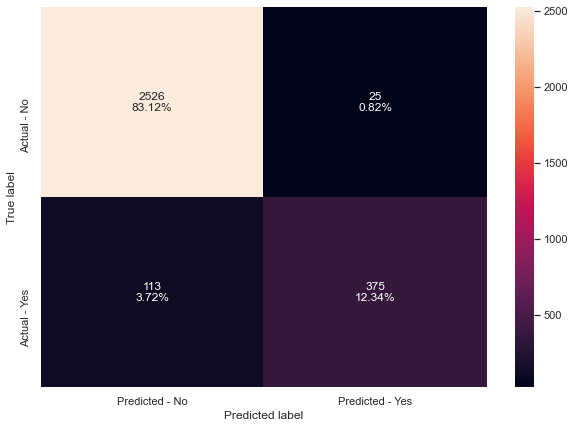

In [97]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
scores_RF = get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random forest is giving slightly higher f1-score than decision trees. But, It is also overfitting the training data.

### 8.3 Bagging Classifier

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9519578808818691
Recall on training set :  0.9806848112379281
Recall on test set :  0.7909836065573771
Precision on training set :  0.9973214285714286
Precision on test set :  0.8976744186046511
F1 on training set :  0.9889331562638336
F1 on test set :  0.8409586056644881


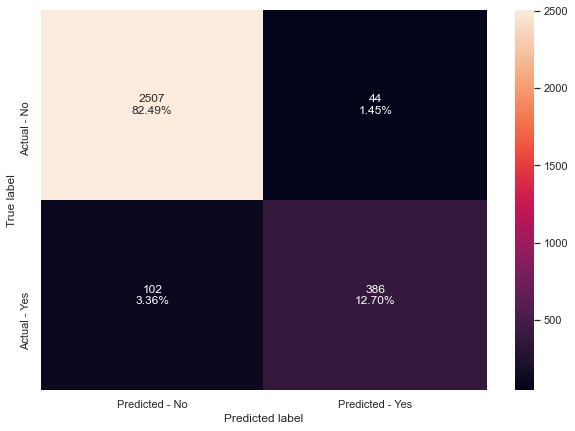

In [98]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
scores_BC = get_metrics_score(bagging_classifier, X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Bagging classifier gives almost same F1-score as random forest. It is also overfitting the training data.

### 8.4 AdaBoost Classifier

Accuracy on training set :  0.9658577878103838
Accuracy on test set :  0.9512997696610728
Recall on training set :  0.8674275680421423
Recall on test set :  0.7991803278688525
Precision on training set :  0.9156626506024096
Precision on test set :  0.8863636363636364
F1 on training set :  0.890892696122633
F1 on test set :  0.8405172413793103


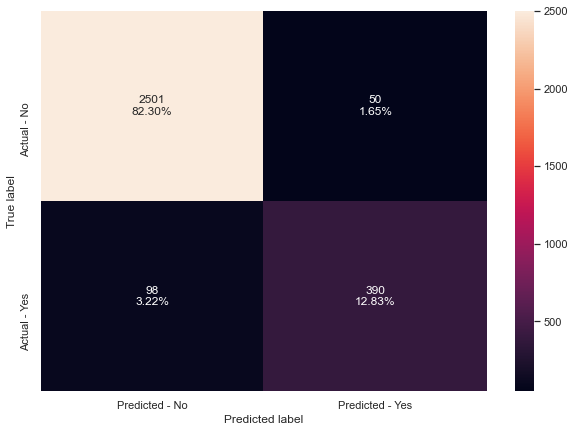

In [99]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
scores_AB = get_metrics_score(ab_classifier, X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)



* Adaboost is giving more generalized performance than previous models but the test f1-score less than 90%

### 8.5 Gradient Boosting Classifier

Accuracy on training set :  0.9784142212189616
Accuracy on test set :  0.9628167160250082
Recall on training set :  0.8999122036874452
Recall on test set :  0.8299180327868853
Precision on training set :  0.9633458646616542
Precision on test set :  0.9310344827586207
F1 on training set :  0.9305492510213346
F1 on test set :  0.8775731310942578


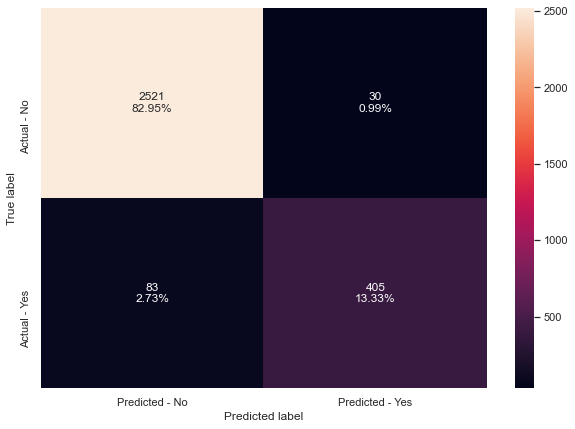

In [100]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
scores_GB = get_metrics_score(gb_classifier, X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)


* The gradient boosting classifier is giving more generalized performance but the test f1-score is still less than 90%

### 8.6 XGBoost Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9710431062849622
Recall on training set :  1.0
Recall on test set :  0.875
Precision on training set :  1.0
Precision on test set :  0.9405286343612335
F1 on training set :  1.0
F1 on test set :  0.9065817409766455


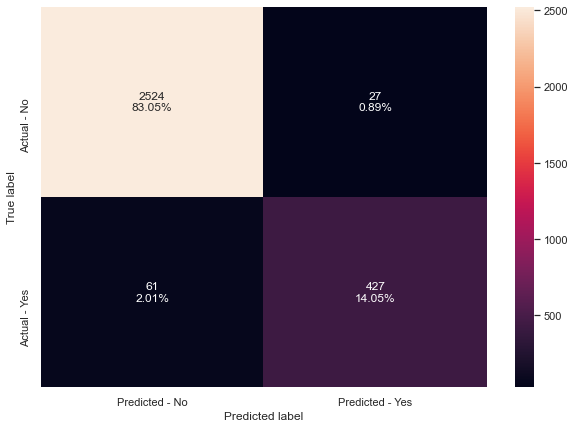

In [101]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
scores_XG = get_metrics_score(xgb_classifier, X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)


* Xgboost classifier is giving the highest test f1-score. It's able to identify both categoties better than the other models but it is overfitting the training data.

### 8.7 Comparing all models

In [127]:
# defining list of models
models = [d_tree,rf_estimator, bagging_classifier,
          ab_classifier, gb_classifier, xgb_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [128]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest',
                                          'Bagging Classifier','AdaBoost Classifier',
                                          'Gradient Boosting Classifier',
                                          'XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
5            XGBoost Classifier            1.00           0.97          1.00   
4  Gradient Boosting Classifier            0.95           0.96          0.90   
1                 Random Forest            1.00           0.95          1.00   
2            Bagging Classifier            0.99           0.95          0.98   
3           AdaBoost Classifier            0.93           0.95          0.87   
0                 Decision Tree            1.00           0.92          1.00   

   Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
5         0.88             1.00            0.94            1.00           0.91  
4         0.83             0.99            0.93            0.94           0.88  
1         0.77             1.00            0.94            1.00           0.84  
2         0.79             1.00            0.90            0.99           0.84  
3         0.80             0.98            0.89            0.92           0.84  
0         0.77             1.00            0.75            1.00           0.76

* Few models such as decision tree, random forest etc are overfitting the training data in terms of f1-score.
* XGBoost classifier is giving the highest training f1-score and higest test f1 score but is overfitting the training data.

# 9. <a id = "link9"></a> Hyperparameter tuning

I am choosing the below three models for hyperparameter tuning. It is basically based on the highest test F1 score. I am not taking XGBoost due to time complexity issue
* Gradient Boosting Classifier 
* Random Forest	
* Bagging Classifier

###  9.1 Gradient Boosting Classifier  using GridSearchCV

In [104]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [50,100,150],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__subsample': 0.9} 
Score: 0.9074099391890973


In [105]:
# Creating new pipeline with best parameters
gboost_tuned = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1, max_features=0.8, n_estimators=150, subsample=0.9),
)

# Fit the model on training data
gboost_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=150,
                                            random_state=1, subsample=0.9))])

Accuracy on training set :  0.9836343115124153
Accuracy on test set :  0.9677525501809806
Recall on training set :  0.9280070237050044
Recall on test set :  0.8565573770491803
Precision on training set :  0.9688359303391384
Precision on test set :  0.9372197309417041
F1 on training set :  0.9479820627802691
F1 on test set :  0.8950749464668095


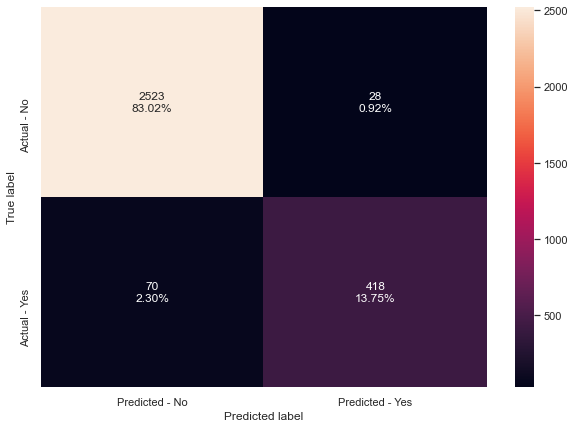

In [106]:
# Calculating different metrics
get_metrics_score(gboost_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gboost_tuned, y_test)

The test F1-score has increased. Looks like model is able to identify both the categories - churners and non-churners 
The tuned Gradient boosting classifier model is overfitting the training data. False negative have gone up slightly

###  9.2 Gradient Boosting Classifier using RandomizedSearchCV

In [107]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [50,100,150],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__max_features': 0.9} 
Score: 0.9018428329538828


In [108]:
# Creating new pipeline with best parameters
gboost_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1, max_features=0.9, n_estimators=150, subsample=0.8),
)

# Fit the model on training data
gboost_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.9, n_estimators=150,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9834932279909706
Accuracy on test set :  0.9661072721289898
Recall on training set :  0.9280070237050044
Recall on test set :  0.8524590163934426
Precision on training set :  0.967948717948718
Precision on test set :  0.930648769574944
F1 on training set :  0.9475571492604214
F1 on test set :  0.8898395721925133


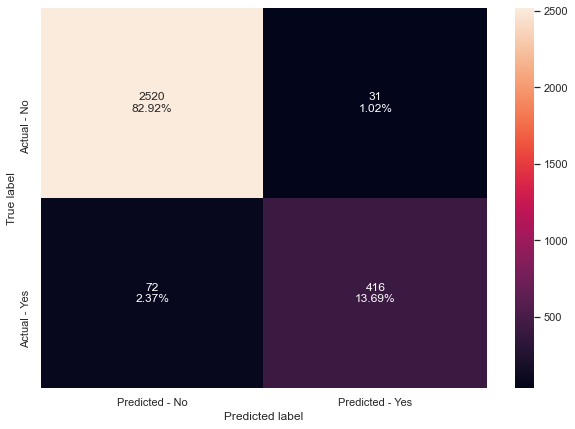

In [109]:
# Calculating different metrics
get_metrics_score(gboost_tuned1, X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gboost_tuned1, y_test)

Gradient Boosting Classifier using RandomizedSearchCV has given slightly less F1-score than Hyperparameter tuning with gridsearchCV. It looks like RandomizedsearcgCV has performed slightly poorer than the gridsearchCV

###  9.3 Random Forest using GridSearchCV

In [110]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'randomforestclassifier__max_depth': list(np.arange(5,30,5)) + [None],
    'randomforestclassifier__max_features': ['sqrt','log2',None],
    'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
    'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
    'randomforestclassifier__n_estimators': np.arange(10,50,10)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 40} 
Score: 0.872789699155837


In [111]:
# Creating new pipeline with best parameters
rf_tuned = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split =2,n_estimators = 40 )
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        n_estimators=40, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9598552155314248
Recall on training set :  0.9973661106233538
Recall on test set :  0.8401639344262295
Precision on training set :  1.0
Precision on test set :  0.9030837004405287
F1 on training set :  0.9986813186813187
F1 on test set :  0.8704883227176221


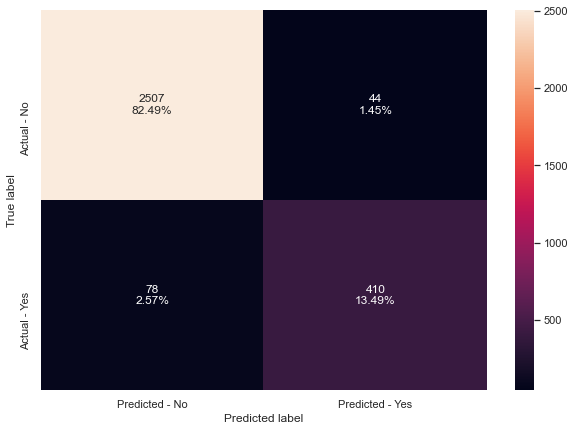

In [112]:
# Calculating different metrics
get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned, y_test)

- This model is overfitting the training data in terms of F1-score but giving a generalized performance in terms of accuracy

###  9.4 Random Forest Classifier using RandomizedSearchCV

In [113]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'randomforestclassifier__max_depth': list(np.arange(5,30,5)) + [None],
    'randomforestclassifier__max_features': ['sqrt','log2',None],
    'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
    'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
    'randomforestclassifier__n_estimators': np.arange(10,50,10)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_depth': 15} 
Score: 0.8699627311435222


In [115]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split =2,n_estimators = 30 )
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        n_estimators=30, random_state=1))])

Accuracy on training set :  0.998589164785553
Accuracy on test set :  0.9575518262586377
Recall on training set :  0.9920983318700615
Recall on test set :  0.8278688524590164
Precision on training set :  0.9991158267020336
Precision on test set :  0.8997772828507795
F1 on training set :  0.9955947136563876
F1 on test set :  0.8623265741728924


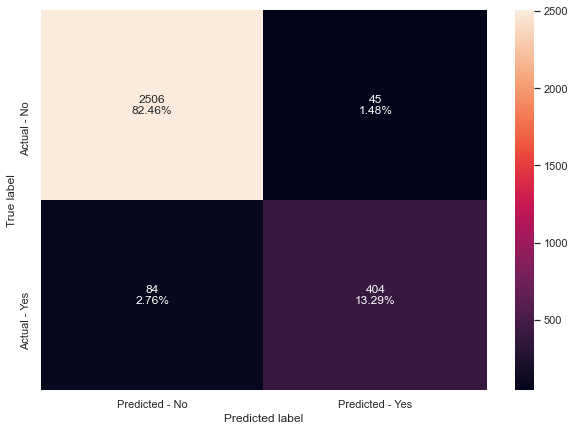

In [116]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

RandomizedSearchCV has given slightly less score than gridsearchCV.

###  9.5 Bagging classifier using GridSearchCV

In [117]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
    'baggingclassifier__max_features': [0.7,0.8,0.9,1],
    'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.7, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.8826877803892994


In [118]:
# Creating new pipeline with best parameters
bc_tuned = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,max_samples=0.9, max_features=0.7,n_estimators = 50 )
)

# Fit the model on training data
bc_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.7, max_samples=0.9,
                                        n_estimators=50, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9631457716354064
Recall on training set :  0.9973661106233538
Recall on test set :  0.8401639344262295
Precision on training set :  1.0
Precision on test set :  0.9234234234234234
F1 on training set :  0.9986813186813187
F1 on test set :  0.8798283261802575


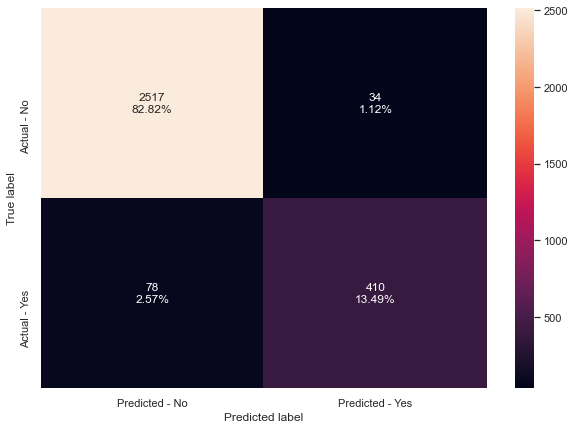

In [119]:
# Calculating different metrics
get_metrics_score(bc_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bc_tuned, y_test)

There is slight drop in False Negative compared to the previous model . But model is overfitting the training data

###  9.6 Bagging classifier using RandomizedSearch CV

In [120]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
    'baggingclassifier__max_features': [0.7,0.8,0.9,1],
    'baggingclassifier__n_estimators' : [10,20,30,40,50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__max_features': 0.7} 
Score: 0.8760591351239511


In [121]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1,max_samples=0.7, max_features=0.7,n_estimators = 50 )
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.7, max_samples=0.7,
                                        n_estimators=50, random_state=1))])

Accuracy on training set :  0.9978837471783296
Accuracy on test set :  0.9644619940769991
Recall on training set :  0.9885864793678666
Recall on test set :  0.8463114754098361
Precision on training set :  0.99822695035461
Precision on test set :  0.9260089686098655
F1 on training set :  0.9933833259814734
F1 on test set :  0.8843683083511777


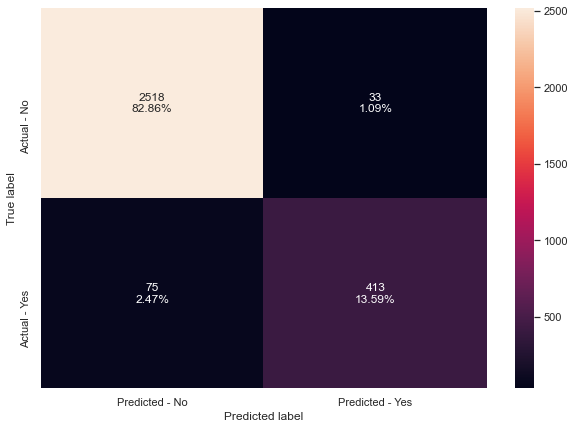

In [122]:
# Calculating different metrics
get_metrics_score(bc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bc_tuned1, y_test)

Slight improvement in the f1-score compared to gridsearchCV

### 9.7 Comparing models from GridsearchCV and RandomisedsearchCV

In [123]:
# defining list of models
models = [gboost_tuned, gboost_tuned1, rf_tuned, rf_tuned1,bc_tuned, bc_tuned1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, X_train,X_test,y_train,y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[4])
    f1_test.append(j[5])

In [124]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Gradient Boost tuned with GridSearchCV",
            "Gradient Boost tuned with RandomizedSearchCV",
            "Random Forest tuned with GridSearchCV",
            "Random Forest tuned with RandomizedSearchCV",
            "Bagging Classifier tuned with GridSearchCV",
            "Bagging Classifier tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_F1", ascending=False)

Model  Train_Accuracy  \
0            Gradient Boost tuned with GridSearchCV            0.98   
1      Gradient Boost tuned with RandomizedSearchCV            0.98   
5  Bagging Classifier tuned with RandomizedSearchCV            1.00   
4        Bagging Classifier tuned with GridSearchCV            1.00   
2             Random Forest tuned with GridSearchCV            1.00   
3       Random Forest tuned with RandomizedSearchCV            1.00   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0           0.97          0.93         0.86             0.97            0.94   
1           0.97          0.93         0.85             0.97            0.93   
5           0.96          0.99         0.85             1.00            0.93   
4           0.96          1.00         0.84             1.00            0.92   
2           0.96          1.00         0.84             1.00            0.90   
3           0.96          0.99         0.83             1.00            0.90   

   Train_F1  Test_F1  
0      0.97     0.94  
1      0.97     0.93  
5      1.00     0.93  
4      1.00     0.92  
2      1.00     0.90  
3      1.00     0.90

* Tuned Gradient boosting with gridsearchCV is giving the highest test F1-score. This model is able to generalized well, able to identify both categories. Gradient boosting with RandomizedsearchCV is also giving better score but slighly less test f1-score. * Other models tend to overfit and unable to generalize will even with hyperparameter tuning.
* Random forest with both hyperparameter methods have given the same train and test F1-score.
* Tuned Bagging classier gives a better score than random forest but still not able to generalize well
* Overall randomsearchCV took lot less time to complete as oppose to gridsearchCV

### 9.8 Feature importance of Tuned Random Forest

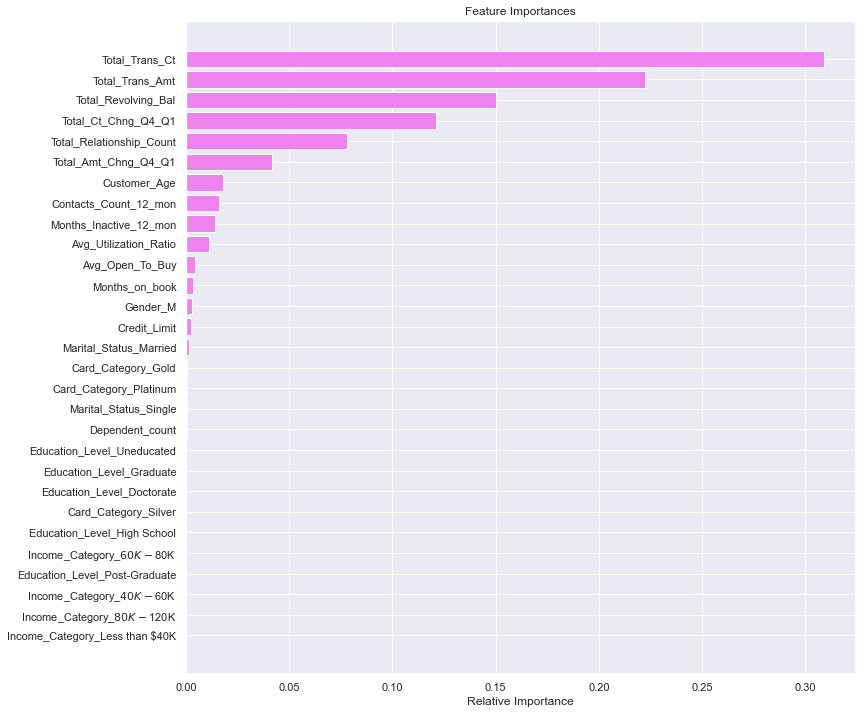

In [125]:
feature_names = X_train.columns
importances = gboost_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total Transaction count is the most important feature that determines whethere the customer will churn or not followed by Total trans amount,  and Total revolving balance.

### 9.8 Finding the coefficients

In [126]:
perc_change_odds = (np.exp(log_reg_under.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Customer_Age  Dependent_count  Months_on_book  \
change_odds%          4.02            37.76            3.39   

              Total_Relationship_Count  Months_Inactive_12_mon  \
change_odds%                    -20.67                   47.94   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
change_odds%                  73.64         -0.03                -0.06   

              Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
change_odds%             0.03                  0.48             0.05   

              Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
change_odds%          -10.61                -5.88                   0.25   

              Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
change_odds%     -3.74                       1.37                      2.33   

              Education_Level_High School  Education_Level_Post-Graduate  \
change_odds%                         0.15                           1.38   

              Education_Level_Uneducated  Marital_Status_Married  \
change_odds%                        0.97                   -2.66   

              Marital_Status_Single  Income_Category_$40K - $60K  \
change_odds%                   8.64                         2.20   

              Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
change_odds%                        -2.00                         -0.04   

              Income_Category_Less than $40K  Card_Category_Gold  \
change_odds%                            7.89                0.61   

              Card_Category_Platinum  Card_Category_Silver  
change_odds%                    0.29                  0.07

# 10. <a id = "link10"></a>Insights & Recommendations

On the basis of my analysis, below are the target audience for effective marketing strategy to retain customer base for the credit card.

- Total Transaction Count: Holding all other features constant a 1 unit change in Total transaction count will decrease the odds of customer churing by `10%`. Customer who used the cards more frequently are less likely to attrite. Total transaction count is also the most important feature that determines the customer attrition

- Total Transaction Amount: Holding all other features constant a 1 unit change in Total transaction amount will increase the odds of customer churing by `0.05%`. More likely that the customer ended up spending more and as a result incurring more interest. Need to target the customers with high trasaction and offer them additional perks to retain these customers.

- Total revolving balance: Holding all other features constant a 1 unit change in Total revolving balance will decrease the odds of customer churing by `0.06%`. Active usage of the card indicate less likelyhood user churing. 

- Total relationship count: Holding all other features constant a 1 unit change in Total relationship count will decrease the odds of customer churing by `20.67%`. This indicates that more products the customers buy less likely they will churn\

- Customer Age: Holding all other features constant a 1 unit change in customer age will increase the odds customer churning by `4%`. Aged customers tend to spend less. It shows that age does influence attrition. Need to target aged customers within the age group between 40 and 50

The company should target customers who have higher dependent count, higher age group, higher total transaction amount as the likelyhood of customers churning due to these factors are high.

In addition, the bank has to devise a targetted marketing campaign keeping the above predictions in mind to retain existing customers and attract new customers.Other strategies include as follows:
-    1. Build and maintain customer loyalty
-   2. Provide credit card retention offer such as lower fees, higher points and better perks
-   3. Successful retention strategies require actions at all levels. This includes acquisition, customer service, collections,        credit, activation and attrition.
-    4. Offer exceptional customer service to retain the existing customers so that they don't end up going to the competitors
-   5. Establish partnerships and nurture relationships by offering free newsletter with helpful tips on spending and bonus points. By doing this, the bank can build an email list to build relationships. 
-    6. Increase marketing spending and devise targetted marketing campaign to retain credit card customers 
-   7. Follow Up with existing customers and gain referrals to expand the customer base.
    